In [1]:
# https://twitter.com/JeevunSandher/status/1504393352887910403

# dataset from here
# https://ifs.org.uk/publications/ds

In [2]:
dataset_name = "W14_comb"
df_list = 'BES_Panel'
#            'BES_reduced_with_na'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

del BES_Panel

Toggle code

In [3]:
BES_census_data_2019 = pd.read_stata( BES_small_data_files + "BES-2019-General-Election-results-file-v1.0.dta" )
print("BES_census_data 2019", BES_census_data_2019.shape )

BES_census_data_2017 = pd.read_stata( BES_small_data_files + "BES-2017-General-Election-results-file-v1.0.dta" )
print("BES_census_data", BES_census_data_2017.shape )

BES_census_data_2015 = pd.read_stata( BES_small_data_files + "BES-2015-General-Election-results-file-v2.21.dta" )
print("BES_census_data 2015", BES_census_data_2015.shape )

BES_census_data = BES_census_data_2019.copy()

#### BUG! -> check if in latest release, if yes, then tell them! ###########
BES_census_data.loc[BES_census_data["Country"].isin(["Scotland"]),"c11Households"] =\
    BES_census_data.loc[BES_census_data["Country"].isin(["Scotland"]),"c11Households"]*100
BES_census_data["ConstituencyName"] = BES_census_data["ConstituencyName"].replace("Ynys Môn","Ynys Mon")
BES_census_data["Winner15"] = BES_census_data["Winner15"].replace("Speaker.","Speaker")

BES_census_data[search(BES_census_data_2015,"SpendPercent").index] = BES_census_data_2015[search(BES_census_data_2015,"SpendPercent").index]

BES_census_data[['SNPLongSpendPercent', 'SNPShortSpendPercent',
       'PCLongSpendPercent', 'PCShortSpendPercent']] = BES_census_data[['SNPLongSpendPercent', 'SNPShortSpendPercent',
       'PCLongSpendPercent', 'PCShortSpendPercent']].replace(".",np.nan).astype('float')

BES_census_data 2019 (632, 385)
BES_census_data (632, 308)
BES_census_data 2015 (632, 277)


In [4]:
party_19_list = search(BES_census_data,"^(Con|Lab|Brexit|LD|UKIP|SNP|PC|Green)19$").index
BES_census_data[[x+"_elec" for x in party_19_list]] = BES_census_data[party_19_list].apply(lambda x: x*BES_census_data["Turnout19"]/100).fillna(0)
BES_census_data["DNV19_elec"] = 100-BES_census_data["Turnout19"]
BES_census_data["DNV&OTH19_elec"] = 100-BES_census_data["Turnout19"]-BES_census_data["Other19"].fillna(0)
BES_census_data["Auth_Right19_elec"] = BES_census_data["Con19_elec"]+BES_census_data["UKIP19_elec"]+BES_census_data["Brexit19_elec"]
BES_census_data["Lib_Left19_elec"] = BES_census_data["Lab19_elec"]+BES_census_data["LD19_elec"]+BES_census_data["PC19_elec"]+BES_census_data["SNP19_elec"]+BES_census_data["Green19_elec"]

party_17_list = search(BES_census_data,"^(Con|Lab|Brexit|LD|UKIP|SNP|PC|Green)17$").index
BES_census_data[[x+"_elec" for x in party_17_list]] = BES_census_data[party_17_list].apply(lambda x: x*BES_census_data["Turnout17"]/100).fillna(0)
BES_census_data["DNV17_elec"] = 100-BES_census_data["Turnout17"]
BES_census_data["DNV&OTH17_elec"] = 100-BES_census_data["Turnout17"]-BES_census_data["Other17"].fillna(0)
BES_census_data["Auth_Right17_elec"] = BES_census_data["Con17_elec"]+BES_census_data["UKIP17_elec"]#+BES_census_data["Brexit17_elec"]
BES_census_data["Lib_Left17_elec"] = BES_census_data["Lab17_elec"]+BES_census_data["LD17_elec"]+BES_census_data["PC17_elec"]\
                                    +BES_census_data["SNP17_elec"]+BES_census_data["Green17_elec"]

party_15_list = search(BES_census_data,"^(Con|Lab|Brexit|LD|UKIP|SNP|PC|Green)15$").index
BES_census_data[[x+"_elec" for x in party_15_list]] = BES_census_data[party_15_list]\
                                    .apply(lambda x: x*BES_census_data["Turnout15"]/100).fillna(0)
BES_census_data["DNV15_elec"] = 100-BES_census_data["Turnout15"]
BES_census_data["DNV&OTH15_elec"] = 100-BES_census_data["Turnout15"]-BES_census_data["Other15"].fillna(0)
BES_census_data["Auth_Right15_elec"] = BES_census_data["Con15_elec"]+BES_census_data["UKIP15_elec"]#+BES_census_data["Brexit17_elec"]
BES_census_data["Lib_Left15_elec"] = BES_census_data["Lab15_elec"]+BES_census_data["LD15_elec"]+BES_census_data["PC15_elec"]\
                                    +BES_census_data["SNP15_elec"]+BES_census_data["Green15_elec"]

party_10_list = search(BES_census_data,"^(Con|Lab|BNP|LD|UKIP|SNP|PC|Green)10$").index
BES_census_data[[x+"_elec" for x in party_10_list]] = BES_census_data[party_10_list].apply(lambda x: x*BES_census_data["Turnout10"]/100).fillna(0)
BES_census_data["DNV10_elec"] = 100-BES_census_data["Turnout10"]
BES_census_data["DNV&OTH10_elec"] = 100-(BES_census_data[party_10_list].apply(lambda x: x*BES_census_data["Turnout10"]/100).sum(axis=1))
BES_census_data["Auth_Right10_elec"] = BES_census_data["Con10_elec"]+BES_census_data["UKIP10_elec"]+BES_census_data["BNP10_elec"]
BES_census_data["Lib_Left10_elec"] = BES_census_data["Lab10_elec"]+BES_census_data["LD10_elec"]+BES_census_data["PC10_elec"]\
                                    +BES_census_data["SNP10_elec"]+BES_census_data["Green10_elec"]

party_05_list = search(BES_census_data,"^(Con|Lab|BNP|LD|UKIP|SNP|PC|Green)05$").index
BES_census_data[[x+"_elec" for x in party_05_list]] = BES_census_data[party_05_list].apply(lambda x: x*BES_census_data["Turnout05"]/100).fillna(0)
BES_census_data["DNV05_elec"] = 100-BES_census_data["Turnout05"]
BES_census_data["DNV&OTH05_elec"] = 100-BES_census_data["Turnout05"]-BES_census_data["Other05"].fillna(0)
BES_census_data["Auth_Right05_elec"] = BES_census_data["Con05_elec"]+BES_census_data["UKIP05_elec"]+BES_census_data["BNP05_elec"]
BES_census_data["Lib_Left05_elec"] = BES_census_data["Lab05_elec"]+BES_census_data["LD05_elec"]+BES_census_data["PC05_elec"]\
                                    +BES_census_data["SNP05_elec"]+BES_census_data["Green05_elec"]


In [5]:
welsh_df = pd.read_excel( open(BES_small_data_files+'welsh_constituency_data.xls','rb'), sheet_name='WelshLanguage' )
welsh_df.columns = welsh_df.loc[4]
welsh_df = welsh_df.drop([0,1,2,3,4,50,51,52])
welsh_df = welsh_df.replace("Ynys Môn","Ynys Mon")
welsh_df = welsh_df.set_index("Assembly Constituency Area")
BES_census_data["speakWelsh"] = [welsh_df.loc[x,"Percentage aged 3+ who can speak Welsh"] if x in welsh_df.index else 0 for x in BES_census_data["ConstituencyName"]  ]

occ_df = pd.read_excel( open(BES_small_data_files+'Census2011-ConstituencyProfile-uk.xlsx','rb'), sheet_name='KS608D' )
occ_df.columns = occ_df.loc[3]
occ_df = occ_df.drop([0,1,2,3,654,])
# occ_df

var_list = ["CON%ELEM","CON%OPS","CON%SAL_SERV","CON%CAR_LEI_","CON%SKILL","CON%ADMIN_SEC","CON%ASSOC_PROF_TECH",
 "CON%PROF","CON%MAN_DIR_SEN"]

# occ_df = occ_df.set_index("ONSConstID").loc[merged.index]
# var_list = ["CON%ELEM","CON%OPS","CON%SAL_SERV","CON%CAR_LEI_","CON%SKILL","CON%ADMIN_SEC","CON%ASSOC_PROF_TECH",
#  "CON%PROF","CON%MAN_DIR_SEN"]

BES_census_data[var_list] = occ_df.set_index("ONSConstID").loc[BES_census_data["ONSConstID"]][var_list].values

merseyside = ["Birkenhead","Bootle","Garston and Halewood","Knowsley",
             "Liverpool, Riverside","Liverpool, Walton","Liverpool, Wavertree","Liverpool, West Derby",
             "Sefton Central","Southport","St Helens North","St Helens South and Whiston",
             "Wallasey","Wirral South","Wirral West"]

BES_census_data["Merseyside"] = BES_census_data["ConstituencyName"].isin(merseyside).astype('float')

In [6]:
df = pd.read_csv(BES_small_data_files+"CentreForTowns"+os.sep+"pcon-classification-csv.csv")

# https://www.centrefortowns.org/our-towns
    
# Type	Definition	Number
# Villages (less than 5,000)	Places with less than 5,000 residents	5,568
# Communities (5-10k)	Places with between 5,000 and 10,000 residents	567
# Small towns (10k-30k)	Towns with between 10,000 and 30,000 residents	550
# Medium towns (30k – 75k)	Towns with between 30,000 and 75,000 residents	242
# Large towns (over 75k)	Towns with over 75,000 residents	102
# Core Cities	Core cities as defined by Pike et al (2016)	12

## doesn't seem so consisent - where is 'communities!'
replace_dict = {"Village or Smaller":"Village or smaller",}
df["classification"] = df["classification"].replace(replace_dict)
centre_for_towns = df.pivot(index='constituency_code', columns='classification', values='percent_of_constituency').fillna(0)
BES_census_data[centre_for_towns.columns] = centre_for_towns.loc[BES_census_data["ONSConstID"]].values

In [7]:
parl_con_aggs = pd.read_csv(BES_small_data_files+"parliamentary constituency data"+os.sep+"Lots of aggregated parliamentary data.csv")

parl_con_aggs = parl_con_aggs.set_index("ONSConstID").drop(['Unnamed: 0', 'pano',
 'RESULTS2019_OTHER', 'RESULTS2019_Registered Voters', 'YOUGOVMRP_DEC_Con', 'YOUGOVMRP_DEC_Lab', 'YOUGOVMRP_DEC_LD',
       'YOUGOVMRP_DEC_Brexit', 'YOUGOVMRP_DEC_Green', 'YOUGOVMRP_DEC_SNP',
       'YOUGOVMRP_DEC_PC', 'YOUGOVMRP_DEC_Other', 'YOUGOVMRP_NOV_Con',
       'YOUGOVMRP_NOV_Lab', 'YOUGOVMRP_NOV_LD', 'YOUGOVMRP_NOV_Brexit',
       'YOUGOVMRP_NOV_Green', 'YOUGOVMRP_NOV_SNP', 'YOUGOVMRP_NOV_PC',
       'YOUGOVMRP_NOV_Other', 'ConVote17', 'TotalVote17', 'RejectedVote17',
       'Electorate17', 'ConVote15', 'TotalVote15', 'RejectedVote15',
       'Electorate15', 'ConVote10', 'TotalVote10', 'Electorate10',
       'c11Population','RESULTS2019_CON', 'RESULTS2019_LAB',
       'RESULTS2019_LIBDEM', 'RESULTS2019_GRN', 'RESULTS2019_SNP',
       'RESULTS2019_PC', 'RESULTS2019_BXP', 'RESULTS2019_UKIP',
       'RESULTS2019_Turnout','Turn10'],axis=1).select_dtypes(['float64','int64'])
parl_con_aggs = parl_con_aggs.drop(set(parl_con_aggs.columns).intersection(set(BES_census_data.columns)),axis=1)
parl_con_aggs = parl_con_aggs.loc[BES_census_data["ONSConstID"]]

BES_census_data[parl_con_aggs.columns] = parl_con_aggs.values
BES_census_data.columns = [x.replace("<","LT") for x in BES_census_data.columns]

In [8]:
BES_constituency_aggregates = pd.read_csv(BES_small_data_files+"parliamentary constituency data"+os.sep+"BES_constituency_aggregates.csv")
BES_constituency_aggregates = BES_constituency_aggregates.set_index("ons_const_id").drop(["Unnamed: 0","constituency_name","pano"],axis=1).loc[BES_census_data["ONSConstID"]]
# (632, 6868)

## a lot - won't add before testing!
nomis_dump = pd.read_csv(BES_data_folder+"Nomis"+os.sep+"2011ONS_England&Wales_by_parlcon.csv")
nomis_dump = nomis_dump.set_index("Unnamed: 0").loc[BES_census_data["ONSConstID"][~BES_census_data["Country"].isin(["Scotland"])]]
## England&Wales

In [272]:
BES_agg_cols = BES_constituency_aggregates.drop(search(BES_constituency_aggregates,"|".join(["winConstituency","profile_past","ashcroft","partyContact",
                                                       "partyId","localElection","localTurnout","^map",
                                                       "generalElectionVote","euroElectionVote",
                                                       "^prefer[^M]","ptv"])).index,axis=1).columns
BES_census_data[BES_agg_cols] = BES_constituency_aggregates[BES_agg_cols].values

BES_census_data.loc[BES_census_data["Country"]!="Scotland",nomis_dump.columns] = nomis_dump.values

In [297]:
drop_cols = ['pano',
 'FOCALDATAMRP_DEC_Conservative',
 'FOCALDATAMRP_DEC_Labour',
 'FOCALDATAMRP_DEC_Liberal Democrats',
 'FOCALDATAMRP_DEC_SNP',
 'FOCALDATAMRP_DEC_Other',
 'FOCALDATAMRP_DEC_Green',
 'FOCALDATAMRP_DEC_Brexit Party',
 'FOCALDATAMRP_DEC_Plaid Cymru',
            'ONSConstID', 'ConstituencyName',
            'CLOCKFACEREP_diversity', 'CLOCKFACEREP_security',
       'CLOCKFACEREP_fecundity', 'CLOCKFACEREP_diversity_flatter',
       'CLOCKFACEREP_security_flatter',
       'ConPPC17', 'LabPPC17', 'LDPPC17', 'SNPPPC17', 'PCPPC17', 'UKIPPPC17',
       'GreenPPC17', 'ConPPC15', 'LabPPC15', 'LDPPC15', 'SNPPPC15', 'PCPPC15',
       'UKIPPPC15', 'GreenPPC15',     # object
       'ONSConstID', 'ConstituencyName', 'SeatChange1719', 'SeatChange1517',
       'SeatChange1015', 'ConPPC19', 'LabPPC19', 'LDPPC19', 'SNPPPC19',
       'PCPPC19', 'UKIPPPC19', 'GreenPPC19', 'BrexitPPC19', 'ConPPC17',
       'LabPPC17', 'LDPPC17', 'SNPPPC17', 'PCPPC17', 'UKIPPPC17', 'GreenPPC17',
       'ConPPC15', 'LabPPC15', 'LDPPC15', 'SNPPPC15', 'PCPPC15', 'UKIPPPC15',
       'GreenPPC15',            
            
            
            ]

In [298]:
# drop_cols = ['Winner17', 'Winner15', 'Winner10','pano',#category
#             'ConVote17', 'TotalVote17', 'Electorate17', 'ConVote15', 'TotalVote15',
#        'Electorate15', 'ConVote10', 'TotalVote10', 'Electorate10', #int
#              'LabVote19', 'Electorate19','RejectedVote19','LabVote05',
#               'Lab17', 'LD17', 'SNP17', 'PC17', 'UKIP17', 'Green17',
#              'Con0510', 'Lab0510', 'LD0510', 'SNP0510', 'PC0510',
#        'BNP0510', 'UKIP0510', 'Green0510',
#              'Con19', 'Lab19', 'LD19', 'SNP19', 'PC19', 'UKIP19', 'Green19',
#        'Brexit19', 'Other19', 'Majority19', 'Turnout19', 'TotalVote19',
#        'Con1719', 'Lab1719', 'LD1719', 'SNP1719', 'PC1719', 'UKIP1719',
#        'Green1719',
#              'ConVote19', 'LDVote19', 'SNPVote19', 'PCVote19', 'UKIPVote19',
#        'GreenVote19', 'BrexitVote19',
#              'leaveHanretty', 'remainHanretty',
#              'Con05', 'Lab05', 'LD05', 'SNP05', 'PC05', 'UKIP05',
#        'Green05', 'BNP05', 'Other05', 'Majority05', 'Turnout05', 'ConVote05',
#        'LDVote05', 'SNPVote05', 'PCVote05', 'UKIPVote05', 'GreenVote05',
#        'BNPVote05',
#              'Winner05', 'ConPPCsex19', 'LabPPCsex19',
#        'LDPPCsex19', 'SNPPPCsex19', 'PCPPCsex19', 'UKIPPPCsex19',
#        'GreenPPCsex19', 'BrexitPPCsex19',
#              # 'Con17',
#        'Other17', 'Majority17', 'Turnout17', 'LabVote17', 'LDVote17',
#        'SNPVote17', 'PCVote17', 'UKIPVote17', 'GreenVote17', 'Con1517',
#        'Lab1517', 'LD1517', 'SNP1517', 'PC1517', 'UKIP1517', 'Green1517',
#        'Con15', 'Lab15', 'LD15', 'SNP15', 'PC15', 'UKIP15', 'Green15',
#        'Other15', 'Majority15', 'Turnout15', 'LabVote15', 'LDVote15',
#        'SNPVote15', 'PCVote15', 'UKIPVote15', 'GreenVote15', 'BNPVote15',
#        'Con1015', 'Lab1015', 'LD1015', 'SNP1015', 'PC1015', 'UKIP1015',
#        'Green1015', 'Con10', 'Lab10', 'LD10', 'SNP10', 'PC10', 'UKIP10',
#        'Green10', 'BNP10', 'Majority10', 'LabVote10', 'LDVote10',
#        'SNPVote10', 'PCVote10', 'UKIPVote10', 'GreenVote10', 'BNPVote10',## float
#        'ONSConstID', 'ConstituencyName', 'SeatChange1517', 'SeatChange1015',
#        'ConPPC17', 'LabPPC17', 'LDPPC17', 'SNPPPC17', 'PCPPC17', 'UKIPPPC17',
#        'GreenPPC17', 'ConPPC15', 'LabPPC15', 'LDPPC15', 'SNPPPC15', 'PCPPC15',
#        'UKIPPPC15', 'GreenPPC15',     # object
#        'ONSConstID', 'ConstituencyName', 'SeatChange1719', 'SeatChange1517',
#        'SeatChange1015', 'ConPPC19', 'LabPPC19', 'LDPPC19', 'SNPPPC19',
#        'PCPPC19', 'UKIPPPC19', 'GreenPPC19', 'BrexitPPC19', 'ConPPC17',
#        'LabPPC17', 'LDPPC17', 'SNPPPC17', 'PCPPC17', 'UKIPPPC17', 'GreenPPC17',
#        'ConPPC15', 'LabPPC15', 'LDPPC15', 'SNPPPC15', 'PCPPC15', 'UKIPPPC15',
#        'GreenPPC15',
#              'ConLongSpendPercent',
#        'ConShortSpendPercent', 'LabLongSpendPercent', 'LabShortSpendPercent',
#        'LDLongSpendPercent', 'LDShortSpendPercent', 'SNPLongSpendPercent',
#        'SNPShortSpendPercent', 'PCLongSpendPercent', 'PCShortSpendPercent',
#        'UKIPLongSpendPercent', 'UKIPShortSpendPercent',
#        'GreenLongSpendPercent', 'GreenShortSpendPercent',
#              'FOCALDATAMRP_DEC_Conservative',
#  'FOCALDATAMRP_DEC_Labour',
#  'FOCALDATAMRP_DEC_Liberal Democrats',
#  'FOCALDATAMRP_DEC_SNP',
#  'FOCALDATAMRP_DEC_Other',
#  'FOCALDATAMRP_DEC_Green',
#  'FOCALDATAMRP_DEC_Brexit Party',
#  'FOCALDATAMRP_DEC_Plaid Cymru',
#         'Winner19',
#              'POLCOMP_Ec-Left-Right', 'POLCOMP_Soc-Lib-Con',
#              'Turnout10',
#             ]+['Con19_elec', 'Lab19_elec',
#        'LD19_elec', 'SNP19_elec', 'PC19_elec', 'UKIP19_elec', 'Green19_elec',
#        'Brexit19_elec', 'DNV19_elec', 'DNV&OTH19_elec', 'Auth_Right19_elec',
#        'Lib_Left19_elec', 'Con17_elec', 'Lab17_elec', 'LD17_elec',
#        'SNP17_elec', 'PC17_elec', 'UKIP17_elec', 'Green17_elec', 'DNV17_elec',
#        'DNV&OTH17_elec', 'Auth_Right17_elec', 'Lib_Left17_elec', 'Con15_elec',
#        'Lab15_elec', 'LD15_elec', 'SNP15_elec', 'PC15_elec', 'UKIP15_elec',
#        'Green15_elec', 'DNV15_elec', 'DNV&OTH15_elec', 'Auth_Right15_elec',
#        'Lib_Left15_elec', 'Con10_elec', 'Lab10_elec', 'LD10_elec',
#        'SNP10_elec', 'PC10_elec', 'UKIP10_elec', 'Green10_elec', 'BNP10_elec',
#        'DNV10_elec', 'DNV&OTH10_elec', 'Auth_Right10_elec', 'Lib_Left10_elec',
#        'Con05_elec', 'Lab05_elec', 'LD05_elec', 'SNP05_elec', 'PC05_elec',
#        'UKIP05_elec', 'Green05_elec', 'BNP05_elec', 'DNV05_elec',
#        'DNV&OTH05_elec', 'Auth_Right05_elec', 'Lib_Left05_elec']+['TotalVote19',
#                                                                   'TotalVote17', 'TotalVote15', 'TotalVote10',
#        'TotalVote05','CLOCKFACEREP_diversity', 'CLOCKFACEREP_security',
#        'CLOCKFACEREP_fecundity', 'CLOCKFACEREP_diversity_flatter',
#        'CLOCKFACEREP_security_flatter',
#         'LL17_elec', 'G-L-L17_elec','G-L17_elec',
#         "LL15_elec","LL10_elec","LL05_elec",
#         "G-L15_elec","G-L10_elec","G-L05_elec",
#         "Con17",
#                                                 ]

# # 'c11Population'

# # df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

In [73]:
df = pd.read_excel(BES_small_data_files+"Sheet_1_LASpendCuts.xlsx",sheet_name="England - cuts by area")

In [74]:
df_eng = df.drop([0,1,155,156,157,158,159]).drop("Unnamed: 0",axis=1)
df_eng.columns = df_eng.loc[2]
df_eng = df_eng.drop(2)
df_eng

2            Local authority Total service spending 2016-17  \
3             City of London                   84139.933201   
4                Westminster                   222565.15883   
5                 Wandsworth                  219307.565436   
6              Tower Hamlets                  327563.978142   
7                     Newham                  288990.031177   
..                       ...                            ...   
150              West Sussex                  533649.892013   
151          Buckinghamshire                  297748.116361   
152                   Surrey                  771622.299383   
153  Windsor & Maidenhead UA                   78917.256936   
154             Wokingham UA                   93607.602805   

2   Total service spending 2009-10 Cut 2009-10 to 2016-17  \
3                     84083.022919               0.000677   
4                    413130.443327              -0.461271   
5                    340859.969787              -0.356605   
6                    450204.981614              -0.272411   
7                    417947.983198               -0.30855   
..                             ...                    ...   
150                  608270.827313              -0.122677   
151                  364673.310009              -0.183521   
152                  824277.355172               -0.06388   
153                   97216.810965              -0.188234   
154                  103894.849639              -0.099016   

2   Grant Dependence 2009-10 Decile 2016-17 group spend 2009-10 group spend  \
3                   0.954813      1      3908985.960599      5862155.613624   
4                   0.855335      1      3908985.960599      5862155.613624   
5                   0.852145      1      3908985.960599      5862155.613624   
6                   0.840248      1      3908985.960599      5862155.613624   
7                   0.837672      1      3908985.960599      5862155.613624   
..                       ...    ...                 ...                 ...   
150                 0.342763     10      5280495.980708      5981848.996116   
151                 0.330681     10      5280495.980708      5981848.996116   
152                 0.313384     10      5280495.980708      5981848.996116   
153                 0.295736     10      5280495.980708      5981848.996116   
154                 0.280707     10      5280495.980708      5981848.996116   

2   Group cut 2009-10 to 2016-17 Group average grant dependence  
3                      -0.333183                       0.816097  
4                      -0.333183                       0.816097  
5                      -0.333183                       0.816097  
6                      -0.333183                       0.816097  
7                      -0.333183                       0.816097  
..                           ...                            ...  
150                    -0.117247                       0.359586  
151                    -0.117247                       0.359586  
152                    -0.117247                       0.359586  
153                    -0.117247                       0.359586  
154                    -0.117247                       0.359586  

[152 rows x 10 columns]

In [51]:
df = pd.read_excel(BES_small_data_files+"Sheet_1_LASpendCuts.xlsx",sheet_name="Scotland - cuts by area")

In [60]:
df_scot_inc_ed = df.drop([0,1,2,37,38]).drop(["Unnamed: 0","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9",],axis=1)
df_scot_inc_ed.columns = df_scot_inc_ed.loc[3]
df_scot_inc_ed = df_scot_inc_ed.drop([3,36])
df_scot_inc_ed.head()

3   Local authority        2009-10 2016-17    Change
4     Aberdeen City  422547.141637  402737 -0.046883
5     Aberdeenshire  538082.691577  493187 -0.083436
6             Angus  248702.681626  216282 -0.130359
7     Argyll & Bute  238187.145621  210131  -0.11779
8  Clackmannanshire  116054.584524   99158 -0.145592

In [66]:
df_scot_ex_ed = df.drop([0,1,2,37,38]).drop(["Unnamed: 0","Unnamed: 1","Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5",],axis=1)
df_scot_ex_ed.columns = df_scot_ex_ed.loc[3]
df_scot_ex_ed = df_scot_ex_ed.drop([3,14])
df_scot_ex_ed.head()

3      Local authority        2009-10 2016-17    Change
4         Glasgow City  1081183.11145  767284 -0.290329
5         Renfrewshire  232946.421379  176166 -0.243749
6   Edinburgh, City of  584676.228854  465955 -0.203055
7  Dumfries & Galloway  199822.702966  159827 -0.200156
8     Clackmannanshire   63055.874359   50446 -0.199979

In [67]:
df = pd.read_excel(BES_small_data_files+"Sheet_1_LASpendCuts.xlsx",sheet_name="Wales - cuts by area")

In [70]:
df_wales_exchb_inced = df.drop([0,1,2,27,28]).drop(["Unnamed: 0","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9",],axis=1)
df_wales_exchb_inced.columns = df_wales_exchb_inced.loc[3]
df_wales_exchb_inced = df_wales_exchb_inced.drop([3,26])
df_wales_exchb_inced.head()

3            Authority        2009-10        2016-17    Change
4       Blaenau Gwent   160563.983857      135582.27 -0.155587
5            Bridgend    275890.05168     255953.377 -0.072263
6           Caerphilly  375303.040603      330203.38 -0.120169
7              Cardiff  621934.807456     604053.806 -0.028751
8      Carmarthenshire  352524.013171     325798.068 -0.075813
9           Ceredigion  151589.893769     136409.778 -0.100139
10               Conwy  231974.869102   205607.33422 -0.113665
11        Denbighshire  213251.510244     181717.676 -0.147872
12          Flintshire  280612.489484     253326.442 -0.097237
13            Gwynedd   249361.992125      228757.57 -0.082629
14    Isle of Anglesey  142605.390318       128880.4 -0.096245
15      Merthyr Tydfil  129863.275352  118418.668283 -0.088128
16       Monmouthshire   166953.73599      142639.53 -0.145634
17   Neath Port Talbot  293379.575206      269890.36 -0.080064
18             Newport  287624.930408     262065.843 -0.088863
19      Pembrokeshire   238580.973769         206918 -0.132714
20               Powys  275630.049158         243378 -0.117012
21  Rhondda Cynon Taff  506664.978514     469631.315 -0.073093
22             Swansea  453548.376258     417576.455 -0.079312
23            Torfaen    189995.12615     169173.086 -0.109592
24   Vale of Glamorgan  229557.466637         218795 -0.046884
25            Wrexham   241184.420323     230957.434 -0.042403

In [72]:
df_wales_exchb_exced = df.drop([0,1,2,27,28]).drop(["Unnamed: 0","Unnamed: 1","Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5",],axis=1)
df_wales_exchb_exced.columns = df_wales_exchb_exced.loc[3]
df_wales_exchb_exced = df_wales_exchb_exced.drop([3,15])
df_wales_exchb_exced#.head()

3            Authority        2009-10     2016-17    Change
4         Denbighshire  116235.569951   90009.845 -0.225626
5                Conwy  134093.681172  108997.192 -0.187156
6       Blaenau Gwent    90692.052128   74770.853 -0.175552
7       Pembrokeshire   123911.278418      103101 -0.167945
8           Caerphilly   197971.27814  165721.227 -0.162903
9        Monmouthshire   90368.195441   76778.711 -0.150379
10            Torfaen    97725.215212   83032.709 -0.150345
11             Newport  148053.232334  128523.543  -0.13191
12    Isle of Anglesey   79299.338049     69054.4 -0.129193
13           Bridgend   147347.682681  129830.363 -0.118884
14            Gwynedd   141901.494773   125243.14 -0.117394
16             Cardiff   334881.95159  301307.816 -0.100257
17          Ceredigion    81860.97001   73683.306 -0.099897
18      Merthyr Tydfil   71922.938656   64925.673 -0.097288
19     Carmarthenshire  185041.066107  167348.623 -0.095614
20   Vale of Glamorgan  113636.399033      103543 -0.088822
21          Flintshire  140966.199896  129231.803 -0.083243
22  Rhondda Cynon Taff  262403.692243  240998.787 -0.081572
23             Swansea   250522.07189      230651 -0.079319
24   Neath Port Talbot    165442.6422  152450.575 -0.078529
25               Powys  144384.475757      134146 -0.070911
26            Wrexham   130546.637791  122105.053 -0.064663

In [75]:
df_eng["Local authority"].sort_values()

14                Barking & Dagenham
65                            Barnet
57                          Barnsley
136    Bath & North East Somerset UA
107                       Bedford UA
                   ...              
55                            Wirral
154                     Wokingham UA
53                     Wolverhampton
131                   Worcestershire
118                          York UA
Name: Local authority, Length: 152, dtype: object

In [45]:
replace_dict = {"St Helens":"St. Helens", "Herefordshire":"Herefordshire, County of",'Bristol':'Bristol, City of','Telford and the Wrekin':'Telford and Wrekin',
"Derby City":"Derby","Middlesborough":"Middlesbrough","Kingston upon Hull":'Kingston upon Hull, City of','City of Nottingham':'Nottingham',
"Leicester City":"Leicester","The Medway Towns":"Medway"}

# Poole: 'Bournemouth, Christchurch and Poole'
# Bournemouth: 'Bournemouth, Christchurch and Poole'

# result of merger in 2019, but they *appear* to line up with the constituencies

In [77]:
df_eng["UA"] = df_eng["Local authority"].apply(lambda x: " UA" in x)

In [79]:
df_eng["LA"] = df_eng["Local authority"].apply(lambda x: x.split(" UA")[0]).apply(lambda x: x.replace("&","and")).replace(replace_dict)
df_eng["LA"]

3              City of London
4                 Westminster
5                  Wandsworth
6               Tower Hamlets
7                      Newham
                ...          
150               West Sussex
151           Buckinghamshire
152                    Surrey
153    Windsor and Maidenhead
154                 Wokingham
Name: LA, Length: 152, dtype: object

In [273]:
# df_eng["LAD"] = df_eng["LA"].apply(lambda x: x in lookup["LAD20NM"].unique())

In [274]:
# df_eng[df_eng["UA"]]

In [90]:
df_eng["Link"] = np.nan

df_eng["Link"][df_eng["LA"].apply(lambda x: x in lookup["LAD20NM"].unique())] = "LAD"
df_eng["Link"][df_eng["LA"].apply(lambda x: (x not in lookup["LAD20NM"].unique()) & (x in lookup["UTLA20NM"].unique()) ) ] = "UTLA"
df_eng["Link"][df_eng["LA"].apply(lambda x: (x not in lookup["LAD20NM"].unique()) & (x not in lookup["UTLA20NM"].unique()) ) ] = "MANUAL"

In [275]:
# BES_census_data[ BES_census_data["ConstituencyName"]=="Poole" ]["ONSConstID"].values[0]

In [276]:
# df_eng["Link"].value_counts()

In [144]:
df_eng["PCON_list"] = np.nan
df_eng["PCON_list"][df_eng["Link"]=="LAD"] = df_eng[df_eng["Link"]=="LAD"]["LA"].apply(lambda x: lookup[lookup["LAD20NM"]==x]["PCON20CD"].unique())
df_eng["PCON_list"][df_eng["Link"]=="UTLA"] = df_eng[df_eng["Link"]=="UTLA"]["LA"].apply(lambda x: lookup[lookup["UTLA20NM"]==x]["PCON20CD"].unique())
df_eng["PCON_list"][df_eng["LA"]=="Poole"] = [BES_census_data[ BES_census_data["ConstituencyName"]=="Poole" ]["ONSConstID"].values[0]]
df_eng["PCON_list"][df_eng["LA"]=="Bournemouth"] = [list(BES_census_data[ BES_census_data["ConstituencyName"].apply(lambda x: "Bournemouth" in x) ]["ONSConstID"].values)]

# lost patience 

In [143]:
df_eng["PCON_list"].apply(lambda x: len(x)).value_counts()

2     48
3     42
4     14
5     12
6     11
1      5
9      5
7      4
8      3
10     2
11     2
14     2
15     1
16     1
Name: PCON_list, dtype: int64

In [277]:
# df_eng[ df_eng["PCON_list"].apply(lambda x: len(x))==1 ]

In [278]:
# missing_vals = df_eng["LA"][ df_eng["LA"].apply(lambda x: x not in lookup["LAD20NM"].unique()) ]
# missing_vals
# missing_vals[missing_vals.apply(lambda x: x in lookup["UTLA20NM"].unique()) ]

In [279]:
# lookup["LAD20NM"].unique()

In [280]:
# lookup["UTLA20NM"].unique()

In [281]:
# lookup["LAD20NM"][ lookup["LAD20NM"].apply(lambda x: x not in df["LA"].unique()) ].unique()

In [24]:
lookup = pd.read_csv(BES_small_data_files+"Ward_to_Westminster_Parliamentary_Constituency_to_Local_Authority_District_to_Upper_Tier_Local_Authority__December_2020__Lookup_in_the_United_Kingdom_V2.csv")

In [282]:
# lookup.describe(include='all')

In [284]:
# lookup[ lookup["UTLA20NM"]=="Cambridgeshire" ]["LAD20NM"].unique()

In [283]:
# lookup["UTLA20NM"].unique()

In [285]:
# lookup

In [286]:
# lookup["LAD20NM"].sort_values().unique()

In [299]:
df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1,errors='ignore'))

In [300]:
# df_simp

In [167]:
# search(BES_census_data,"population")

In [301]:
def weight_const_av(const_list):
    mask = BES_census_data["ONSConstID"].apply(lambda x: x in const_list)
    df = df_simp[mask]
    df["wt"] = df["c11Population"]
    df["wt"] = df["wt"]/df["wt"].sum()
    return df.apply(lambda x: x*x["wt"],axis=1).sum().drop('wt')

In [302]:
df_LA = df_eng["PCON_list"].apply(lambda x: weight_const_av(x))

In [228]:
# max([df_LA["Lab10"],df_LA["LD10"],df_LA["SNP10"],df_LA["PC10"],df_LA["UKIP10"],df_LA["Green10"],df_LA["BNP10"]])

In [311]:
df_LA["ConMajority10"] = df_LA["Con10"]-df_LA[["Lab10","LD10","SNP10","PC10","UKIP10","Green10","BNP10"]].max(axis=1)

In [303]:
search(df_LA,"Lab")

Lab19                 152
LabVote19             152
Lab1719               152
Lab17                 152
LabVote17             152
                     ... 
LabPPCsex17_Female    152
LabPPCsex15_Male      152
LabPPCsex15_Female    152
LabPPCrace15_White    152
LabPPCrace15_BME      152
Length: 2447, dtype: int64

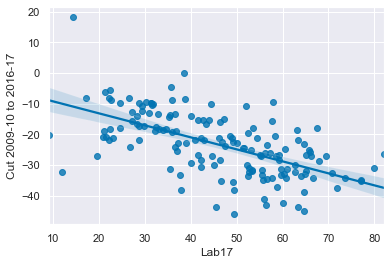

In [307]:
sns.regplot(x=df_LA["Lab17"],y=df_eng["Cut 2009-10 to 2016-17"].astype('float')*100)

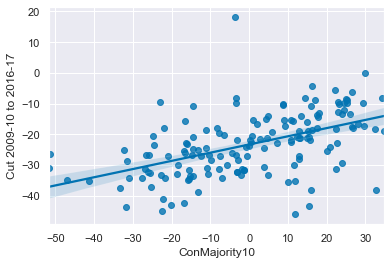

In [217]:
sns.regplot(x=df_LA["ConMajority10"],y=df_eng["Cut 2009-10 to 2016-17"].astype('float')*100)

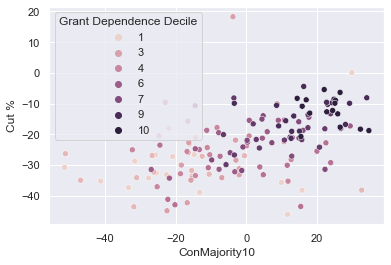

In [230]:
sns.scatterplot(data = df_LA,x="ConMajority10",y="Cut %",hue="Grant Dependence Decile")
    
#     x=df_LA["ConMajority10"],y=df_eng["Cut 2009-10 to 2016-17"].astype('float')*100)

In [233]:
df_eng.loc[34]

2
Local authority                   Isles of Scilly
Total service spending 2016-17         4642.19899
Total service spending 2009-10        3924.356446
Cut 2009-10 to 2016-17                    0.18292
Grant Dependence 2009-10                 0.703695
Decile                                          3
2016-17 group spend                2661612.704389
2009-10 group spend                3823059.951886
Group cut 2009-10 to 2016-17              -0.3038
Group average grant dependence           0.689985
LA                                Isles of Scilly
UA                                          False
LAD                                          True
Link                                          LAD
PCON_list                             [E14000964]
Name: 34, dtype: object

In [309]:
df_LA["Cut %"] = df_eng["Cut 2009-10 to 2016-17"].astype('float')*100
df_LA["Cut Abs"] = df_eng["Total service spending 2016-17"].astype('float') - df_eng["Total service spending 2009-10"].astype('float')
df_LA["Grant Dependence Decile"] = df_eng["Decile"]
df_LA["Grant Dependence"] = df_eng["Grant Dependence 2009-10"].astype('float')
df_LA["Total service spending 2016-17"] = df_eng["Total service spending 2016-17"].astype('float')
df_LA["Total service spending 2009-10"] = df_eng["Total service spending 2009-10"].astype('float')
df_LA["Cut %"] = -df_LA["Cut %"]

In [268]:
# g = sns.lmplot(data =df_LA, x="ConMajority10",y="Cut %",col="Decile")
# import scipy as sp
# def annotate(data, **kws):
#     r, p = sp.stats.pearsonr(data["ConMajority10"], data["Cut %"])
#     ax = plt.gca()
#     ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
#             transform=ax.transAxes)
    
# g.map_dataframe(annotate)

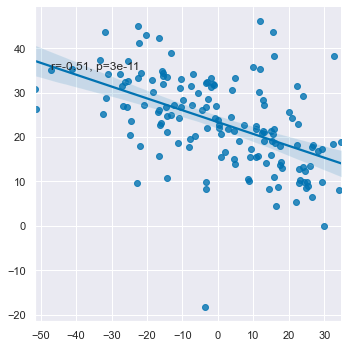

In [312]:
g = sns.lmplot(data =df_LA, x="ConMajority10",y="Cut %")
import scipy as sp
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data["ConMajority10"], data["Cut %"])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)

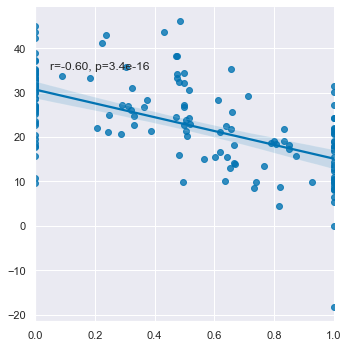

In [337]:
x_ax = "Winner17_Conservative"

g = sns.lmplot(data =df_LA, x=x_ax,y="Cut %")
import scipy as sp
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_ax], data["Cut %"])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)

In [198]:
df_eng["Cut 2009-10 to 2016-17"].astype('float')

3      0.000677
4     -0.461271
5     -0.356605
6     -0.272411
7     -0.308550
         ...   
150   -0.122677
151   -0.183521
152   -0.063880
153   -0.188234
154   -0.099016
Name: Cut 2009-10 to 2016-17, Length: 152, dtype: float64

In [248]:
df_eng

2            Local authority Total service spending 2016-17  \
3             City of London                   84139.933201   
4                Westminster                   222565.15883   
5                 Wandsworth                  219307.565436   
6              Tower Hamlets                  327563.978142   
7                     Newham                  288990.031177   
..                       ...                            ...   
150              West Sussex                  533649.892013   
151          Buckinghamshire                  297748.116361   
152                   Surrey                  771622.299383   
153  Windsor & Maidenhead UA                   78917.256936   
154             Wokingham UA                   93607.602805   

2   Total service spending 2009-10 Cut 2009-10 to 2016-17  \
3                     84083.022919               0.000677   
4                    413130.443327              -0.461271   
5                    340859.969787              -0.356605   
6                    450204.981614              -0.272411   
7                    417947.983198               -0.30855   
..                             ...                    ...   
150                  608270.827313              -0.122677   
151                  364673.310009              -0.183521   
152                  824277.355172               -0.06388   
153                   97216.810965              -0.188234   
154                  103894.849639              -0.099016   

2   Grant Dependence 2009-10 Decile 2016-17 group spend 2009-10 group spend  \
3                   0.954813      1      3908985.960599      5862155.613624   
4                   0.855335      1      3908985.960599      5862155.613624   
5                   0.852145      1      3908985.960599      5862155.613624   
6                   0.840248      1      3908985.960599      5862155.613624   
7                   0.837672      1      3908985.960599      5862155.613624   
..                       ...    ...                 ...                 ...   
150                 0.342763     10      5280495.980708      5981848.996116   
151                 0.330681     10      5280495.980708      5981848.996116   
152                 0.313384     10      5280495.980708      5981848.996116   
153                 0.295736     10      5280495.980708      5981848.996116   
154                 0.280707     10      5280495.980708      5981848.996116   

2   Group cut 2009-10 to 2016-17 Group average grant dependence  \
3                      -0.333183                       0.816097   
4                      -0.333183                       0.816097   
5                      -0.333183                       0.816097   
6                      -0.333183                       0.816097   
7                      -0.333183                       0.816097   
..                           ...                            ...   
150                    -0.117247                       0.359586   
151                    -0.117247                       0.359586   
152                    -0.117247                       0.359586   
153                    -0.117247                       0.359586   
154                    -0.117247                       0.359586   

2                        LA     UA    LAD  Link  \
3            City of London  False   True   LAD   
4               Westminster  False   True   LAD   
5                Wandsworth  False   True   LAD   
6             Tower Hamlets  False   True   LAD   
7                    Newham  False   True   LAD   
..                      ...    ...    ...   ...   
150             West Sussex  False  False  UTLA   
151         Buckinghamshire  False   True   LAD   
152                  Surrey  False  False  UTLA   
153  Windsor and Maidenhead   True   True   LAD   
154               Wokingham   True   True   LAD   

2                                            PCON_list  
3                                          [E14000639]  
4                            

In [178]:
search(df_LA,"country")

Country_England     152
Country_Scotland    152
Country_Wales       152
dtype: int64

In [185]:
df_LA["Winner10_Speaker"].sort_values()

3      0.000000
99     0.000000
100    0.000000
101    0.000000
102    0.000000
         ...   
55     0.000000
56     0.000000
49     0.000000
154    0.000000
151    0.192336
Name: Winner10_Speaker, Length: 152, dtype: float64

In [186]:
df_LA.loc[151,"ConMajority10"]

## maybe drop because Speaker?

14.686142438989627

In [187]:
df_LA["ConMajority10"].describe()

count    152.000000
mean     -25.109122
std       22.025113
min      -77.022793
25%      -43.575589
50%      -21.632743
75%       -7.154670
max       20.748671
Name: ConMajority10, dtype: float64

In [292]:
# df_LA.drop("Decile",axis=1,inplace=True)

In [251]:
df_eng

2            Local authority Total service spending 2016-17  \
3             City of London                   84139.933201   
4                Westminster                   222565.15883   
5                 Wandsworth                  219307.565436   
6              Tower Hamlets                  327563.978142   
7                     Newham                  288990.031177   
..                       ...                            ...   
150              West Sussex                  533649.892013   
151          Buckinghamshire                  297748.116361   
152                   Surrey                  771622.299383   
153  Windsor & Maidenhead UA                   78917.256936   
154             Wokingham UA                   93607.602805   

2   Total service spending 2009-10 Cut 2009-10 to 2016-17  \
3                     84083.022919               0.000677   
4                    413130.443327              -0.461271   
5                    340859.969787              -0.356605   
6                    450204.981614              -0.272411   
7                    417947.983198               -0.30855   
..                             ...                    ...   
150                  608270.827313              -0.122677   
151                  364673.310009              -0.183521   
152                  824277.355172               -0.06388   
153                   97216.810965              -0.188234   
154                  103894.849639              -0.099016   

2   Grant Dependence 2009-10 Decile 2016-17 group spend 2009-10 group spend  \
3                   0.954813      1      3908985.960599      5862155.613624   
4                   0.855335      1      3908985.960599      5862155.613624   
5                   0.852145      1      3908985.960599      5862155.613624   
6                   0.840248      1      3908985.960599      5862155.613624   
7                   0.837672      1      3908985.960599      5862155.613624   
..                       ...    ...                 ...                 ...   
150                 0.342763     10      5280495.980708      5981848.996116   
151                 0.330681     10      5280495.980708      5981848.996116   
152                 0.313384     10      5280495.980708      5981848.996116   
153                 0.295736     10      5280495.980708      5981848.996116   
154                 0.280707     10      5280495.980708      5981848.996116   

2   Group cut 2009-10 to 2016-17 Group average grant dependence  \
3                      -0.333183                       0.816097   
4                      -0.333183                       0.816097   
5                      -0.333183                       0.816097   
6                      -0.333183                       0.816097   
7                      -0.333183                       0.816097   
..                           ...                            ...   
150                    -0.117247                       0.359586   
151                    -0.117247                       0.359586   
152                    -0.117247                       0.359586   
153                    -0.117247                       0.359586   
154                    -0.117247                       0.359586   

2                        LA     UA    LAD  Link  \
3            City of London  False   True   LAD   
4               Westminster  False   True   LAD   
5                Wandsworth  False   True   LAD   
6             Tower Hamlets  False   True   LAD   
7                    Newham  False   True   LAD   
..                      ...    ...    ...   ...   
150             West Sussex  False  False  UTLA   
151         Buckinghamshire  False   True   LAD   
152                  Surrey  False  False  UTLA   
153  Windsor and Maidenhead   True   True   LAD   
154               Wokingham   True   True   LAD   

2                                            PCON_list  
3                                          [E14000639]  
4                            

MSE: 77.40, MAE: 6.46, EV: 0.39, R2: 0.39


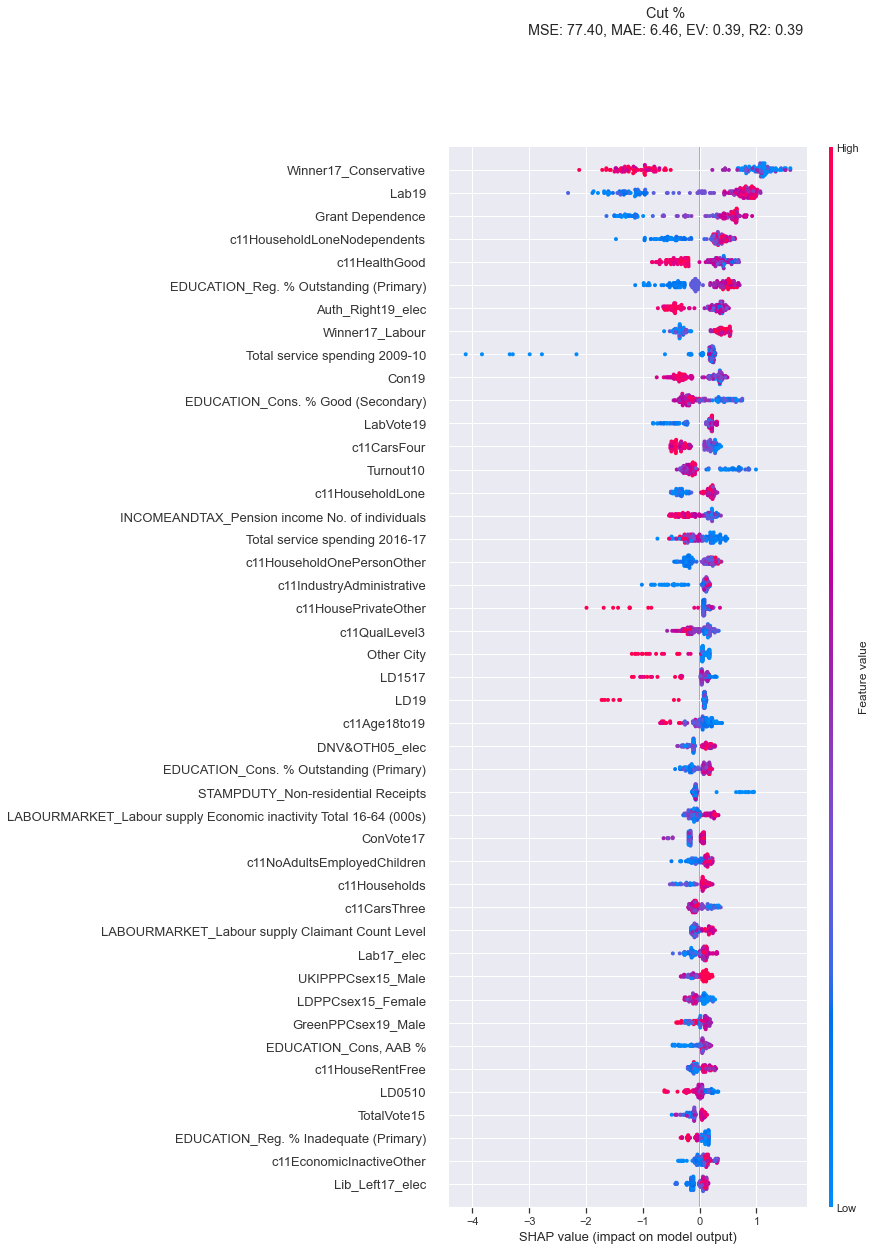

<Figure size 1152x720 with 0 Axes>

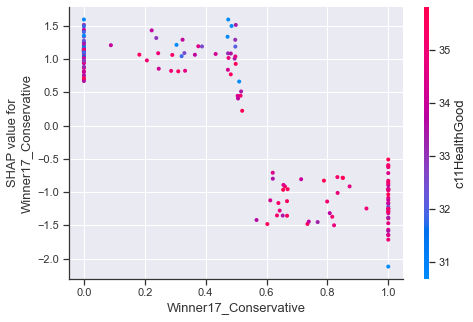

<Figure size 1152x720 with 0 Axes>

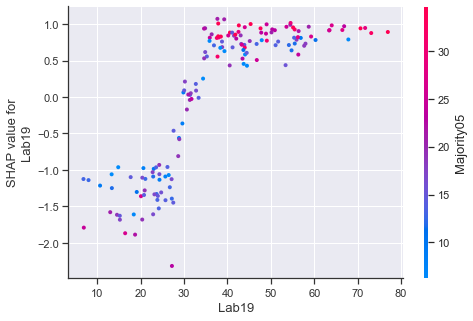

<Figure size 1152x720 with 0 Axes>

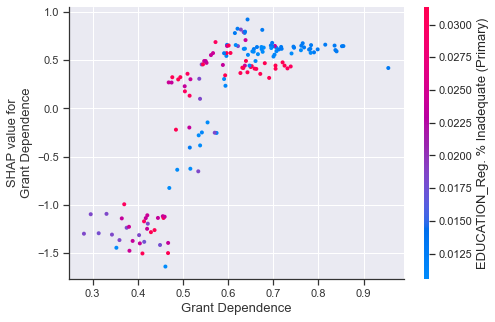

<Figure size 1152x720 with 0 Axes>

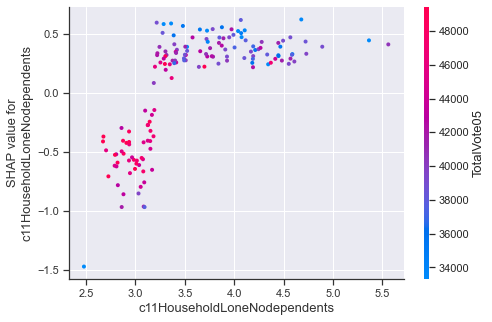

<Figure size 1152x720 with 0 Axes>

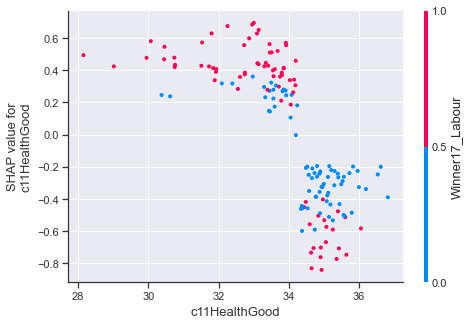

<Figure size 1152x720 with 0 Axes>

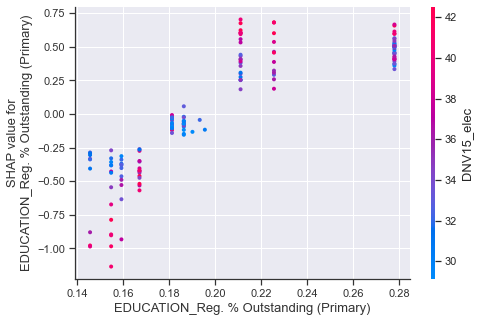

<Figure size 1152x720 with 0 Axes>

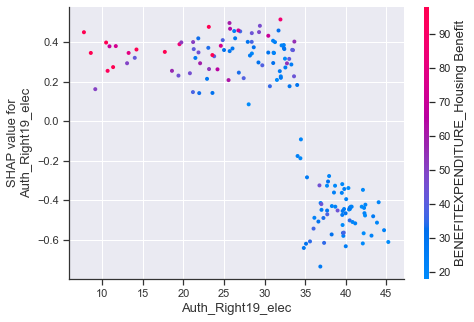

<Figure size 1152x720 with 0 Axes>

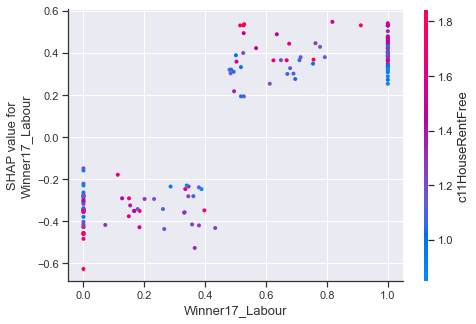

<Figure size 1152x720 with 0 Axes>

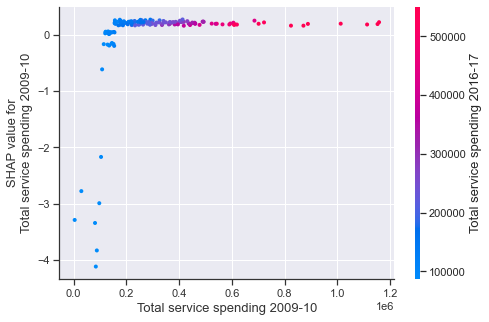

<Figure size 1152x720 with 0 Axes>

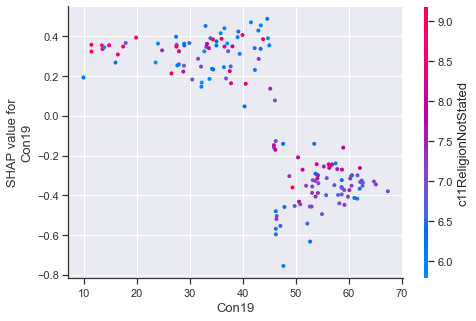

<Figure size 1152x720 with 0 Axes>

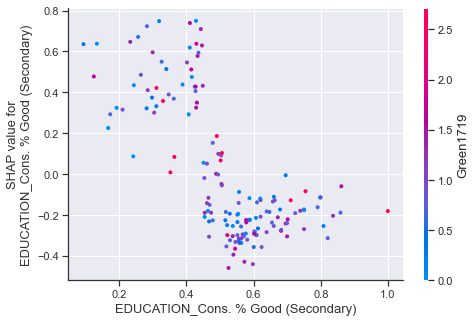

<Figure size 1152x720 with 0 Axes>

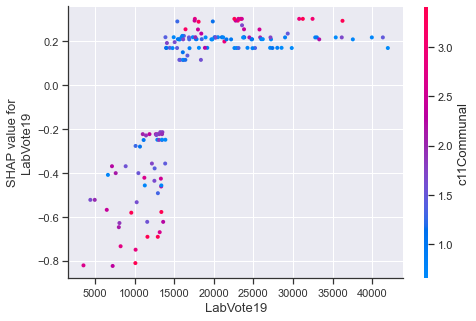

<Figure size 1152x720 with 0 Axes>

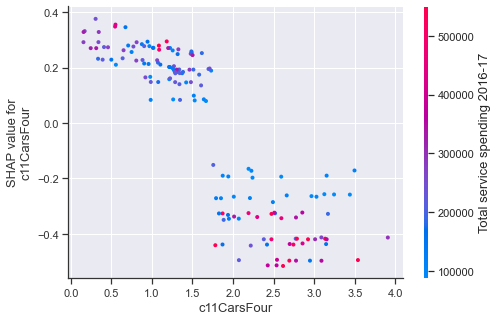

<Figure size 1152x720 with 0 Axes>

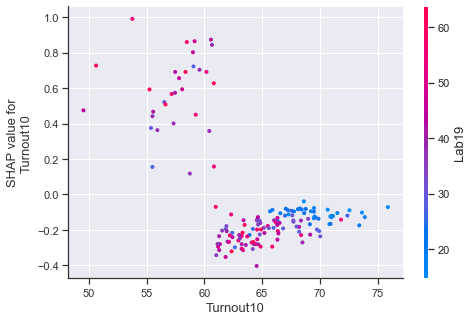

<Figure size 1152x720 with 0 Axes>

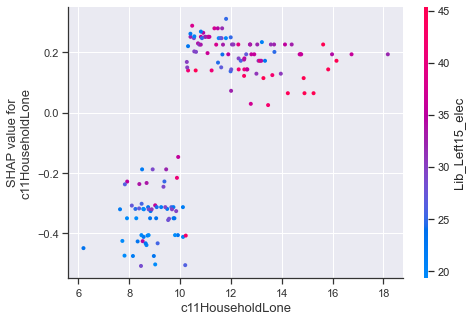

<Figure size 1152x720 with 0 Axes>

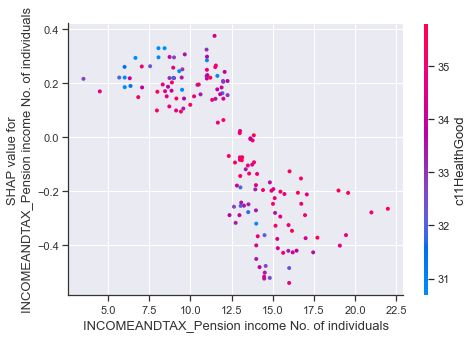

<Figure size 1152x720 with 0 Axes>

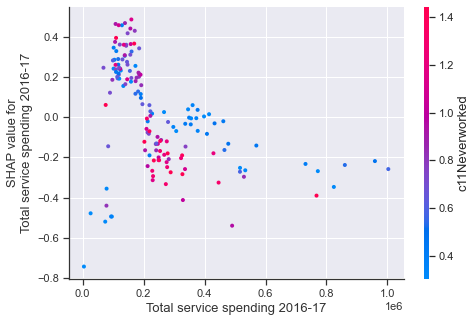

<Figure size 1152x720 with 0 Axes>

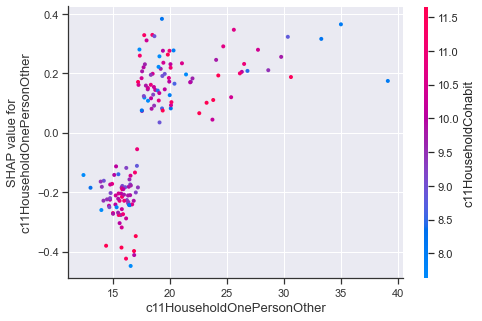

<Figure size 1152x720 with 0 Axes>

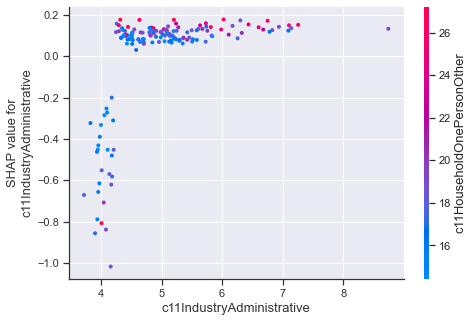

<Figure size 1152x720 with 0 Axes>

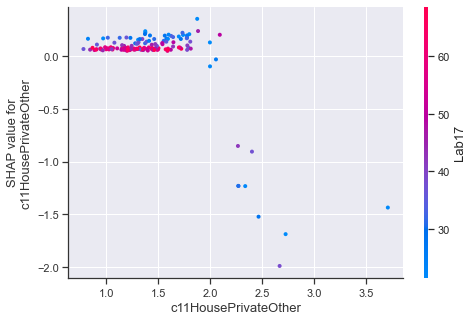

<Figure size 1152x720 with 0 Axes>

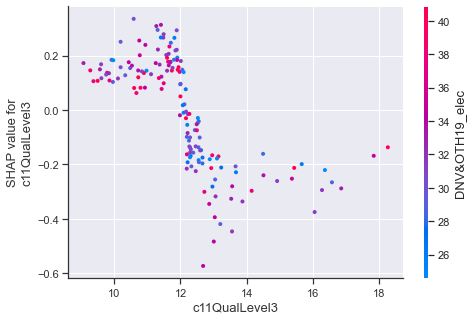

<Figure size 1152x720 with 0 Axes>

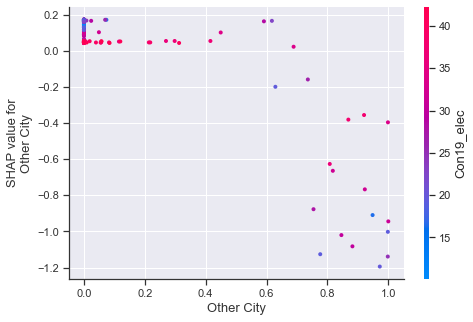

<Figure size 1152x720 with 0 Axes>

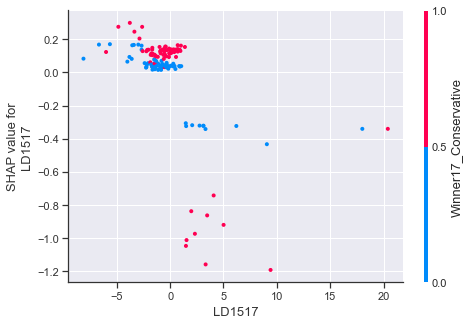

<Figure size 1152x720 with 0 Axes>

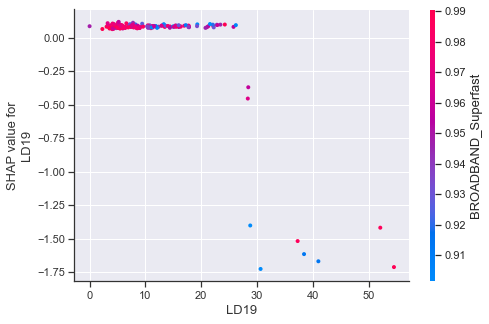

<Figure size 1152x720 with 0 Axes>

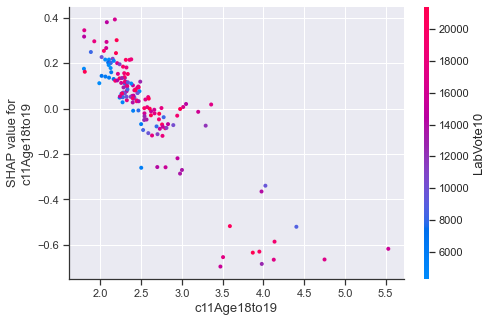

<Figure size 1152x720 with 0 Axes>

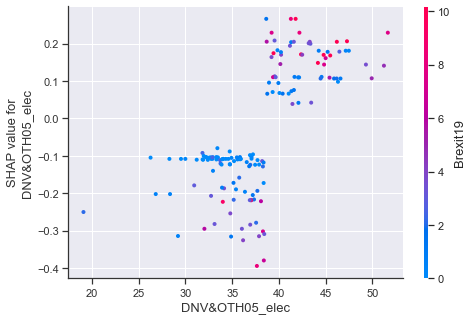

<Figure size 1152x720 with 0 Axes>

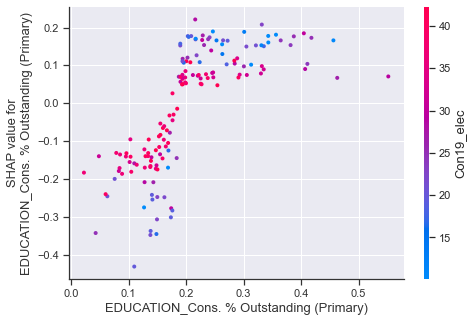

<Figure size 1152x720 with 0 Axes>

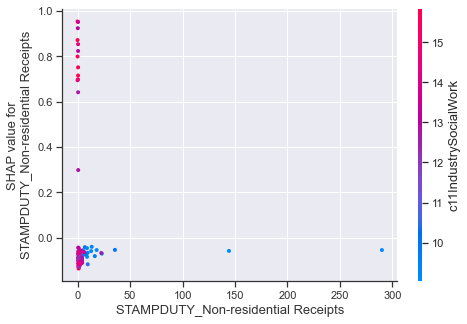

<Figure size 1152x720 with 0 Axes>

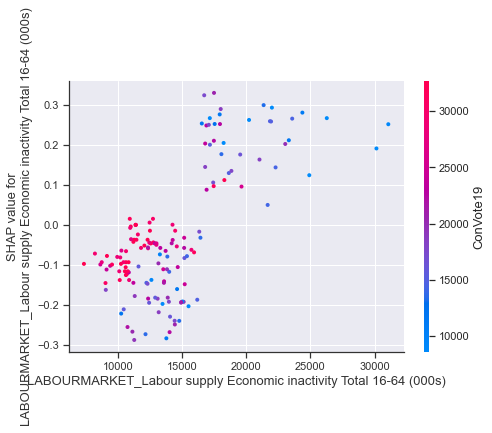

<Figure size 1152x720 with 0 Axes>

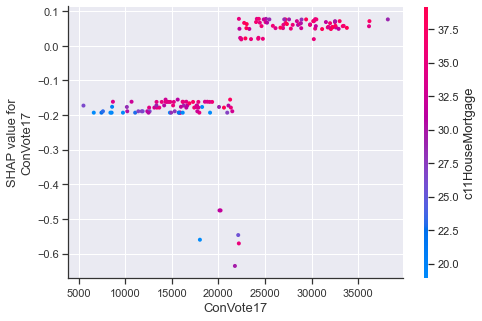

<Figure size 1152x720 with 0 Axes>

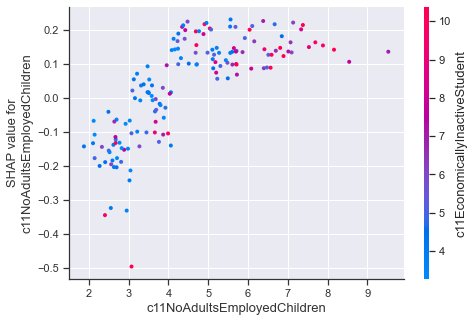

<Figure size 1152x720 with 0 Axes>

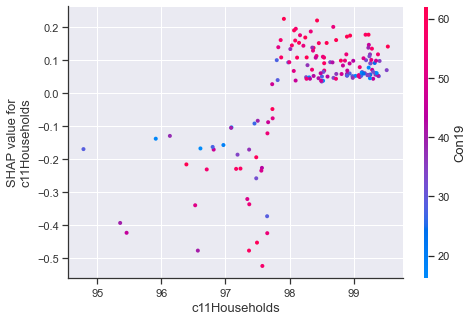

<Figure size 1152x720 with 0 Axes>

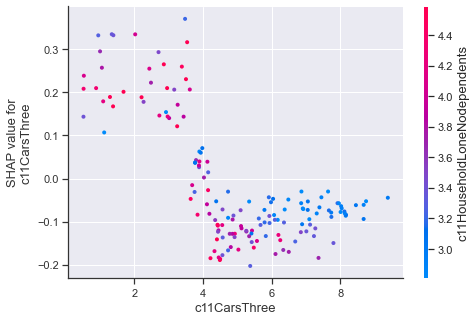

<Figure size 1152x720 with 0 Axes>

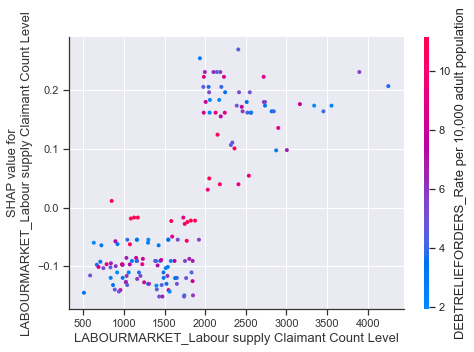

<Figure size 1152x720 with 0 Axes>

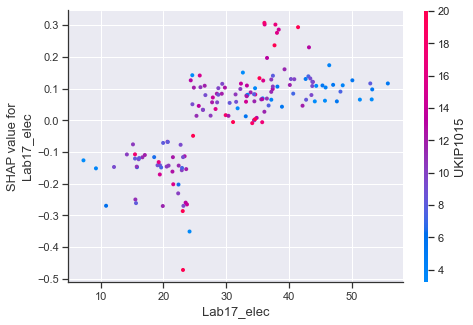

<Figure size 1152x720 with 0 Axes>

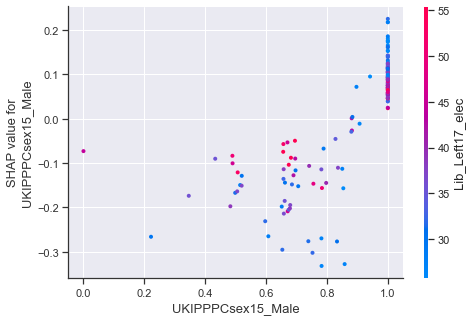

<Figure size 1152x720 with 0 Axes>

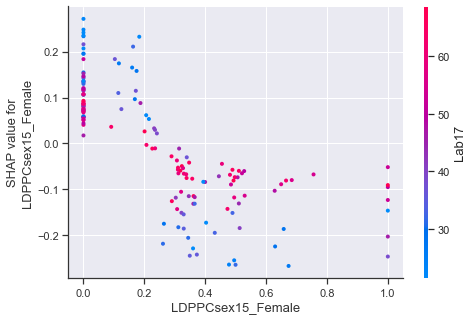

<Figure size 1152x720 with 0 Axes>

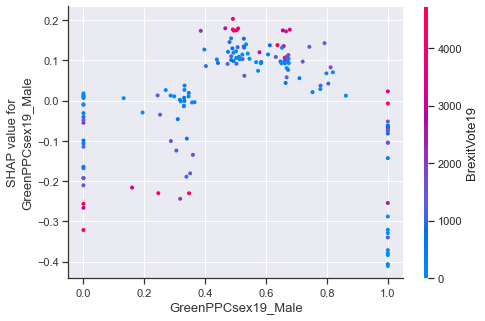

<Figure size 1152x720 with 0 Axes>

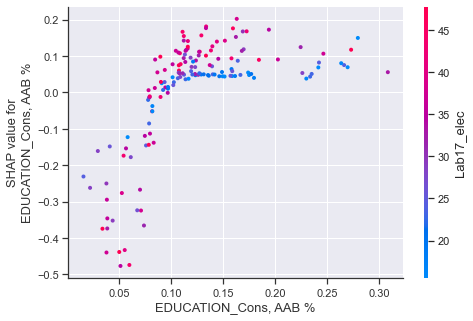

<Figure size 1152x720 with 0 Axes>

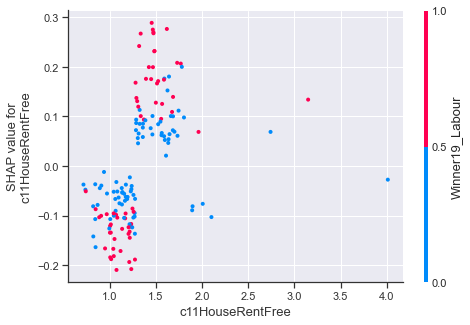

<Figure size 1152x720 with 0 Axes>

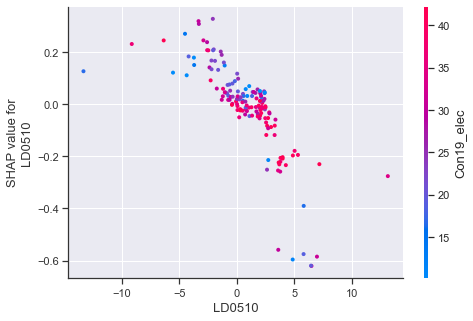

<Figure size 1152x720 with 0 Axes>

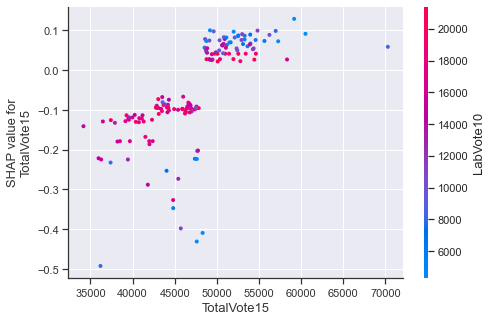

<Figure size 1152x720 with 0 Axes>

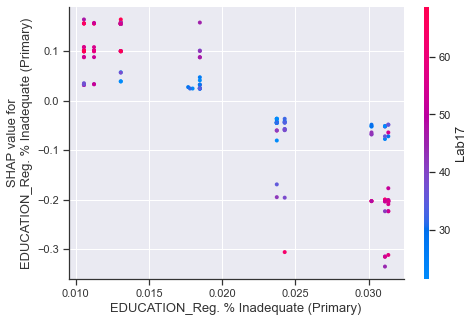

<Figure size 1152x720 with 0 Axes>

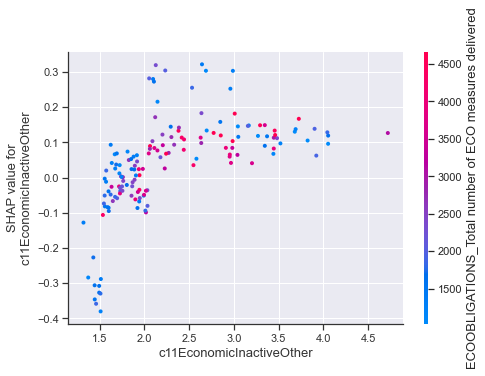

<Figure size 1152x720 with 0 Axes>

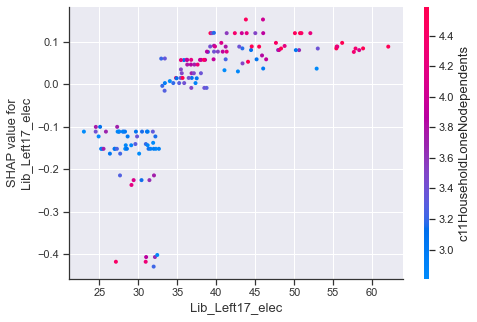

In [257]:
# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "Cut %"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_LA[var_stub].notnull()
wt_cols = []
min_features = 10
colname = "Cut %"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Cut %"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_LA.drop(["Cut Abs","Grant Dependence Decile"],axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [ ]:
## next up, redo without political variables

## then do with 

MSE: 80.08, MAE: 6.33, EV: 0.37, R2: 0.37


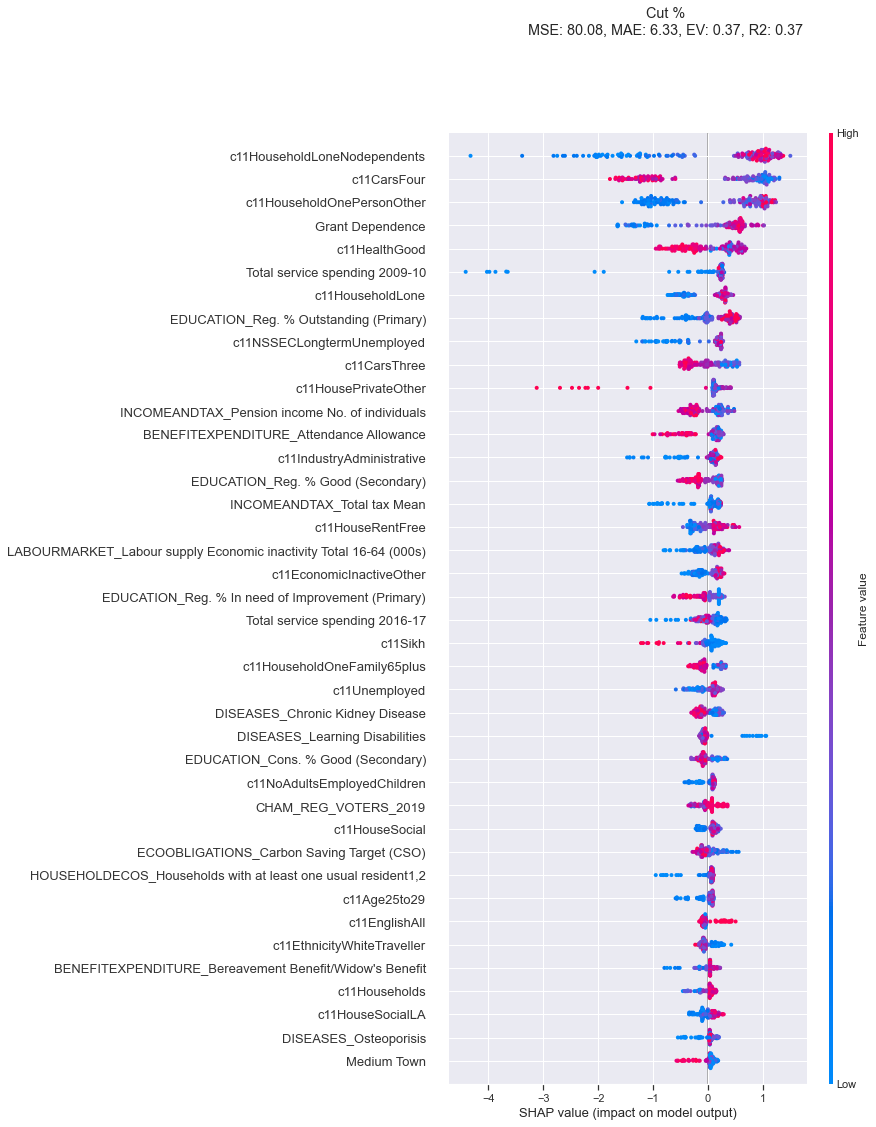

<Figure size 1152x720 with 0 Axes>

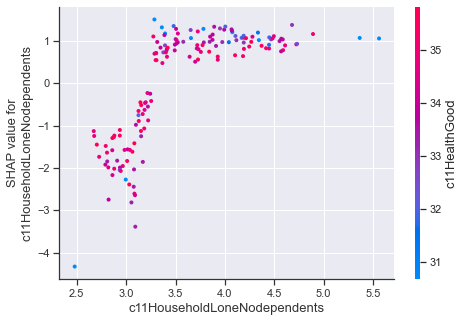

<Figure size 1152x720 with 0 Axes>

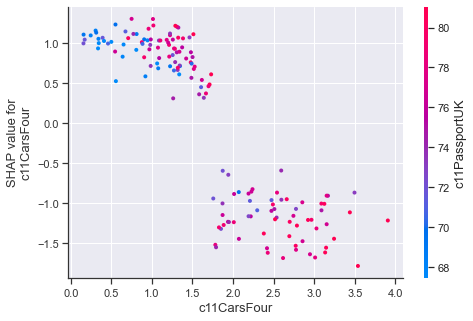

<Figure size 1152x720 with 0 Axes>

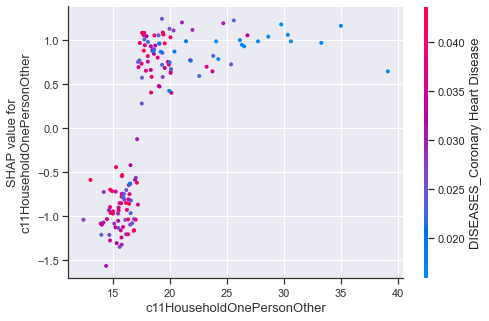

<Figure size 1152x720 with 0 Axes>

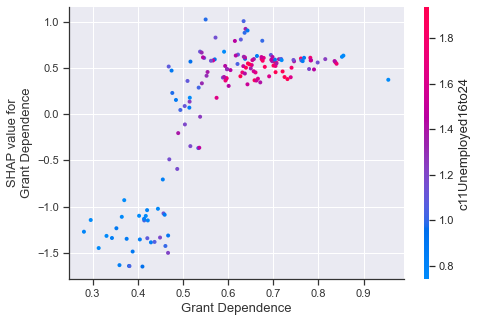

<Figure size 1152x720 with 0 Axes>

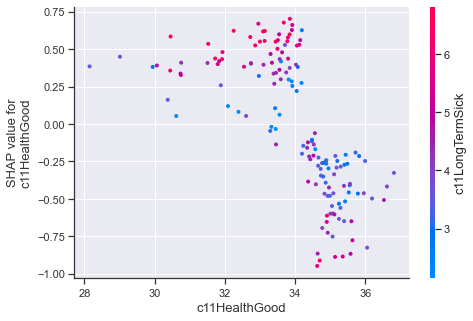

<Figure size 1152x720 with 0 Axes>

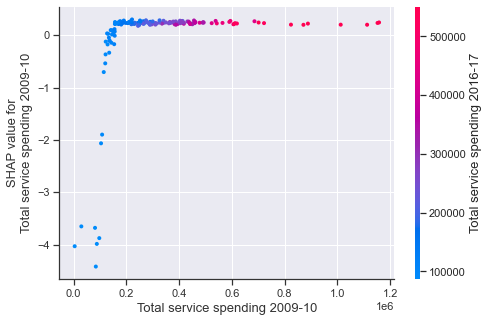

<Figure size 1152x720 with 0 Axes>

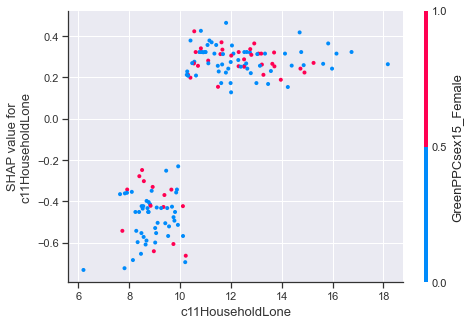

<Figure size 1152x720 with 0 Axes>

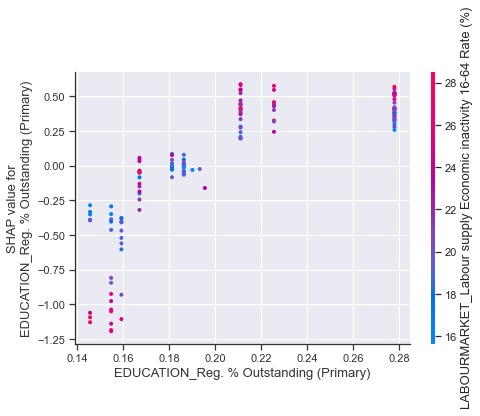

<Figure size 1152x720 with 0 Axes>

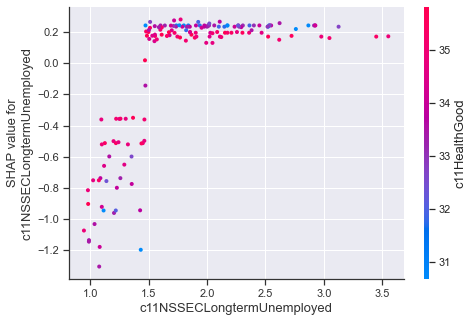

<Figure size 1152x720 with 0 Axes>

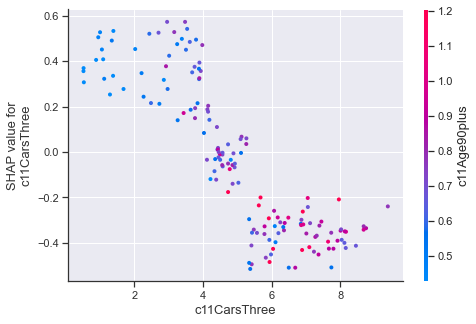

<Figure size 1152x720 with 0 Axes>

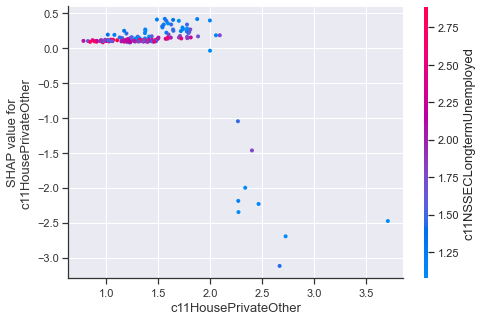

<Figure size 1152x720 with 0 Axes>

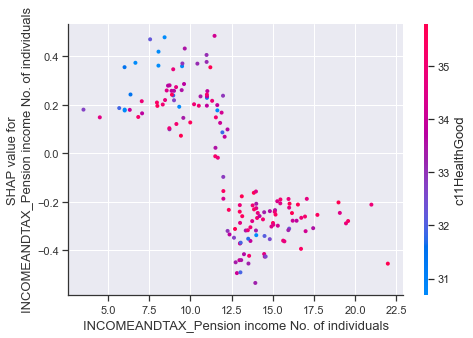

<Figure size 1152x720 with 0 Axes>

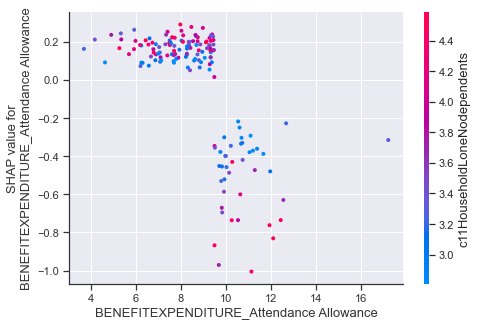

<Figure size 1152x720 with 0 Axes>

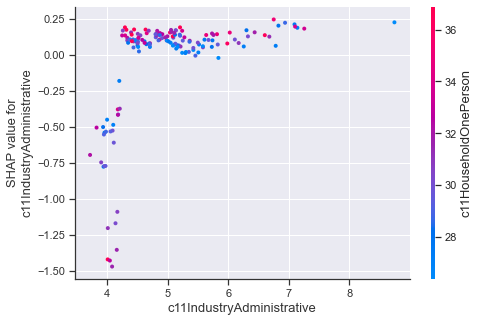

<Figure size 1152x720 with 0 Axes>

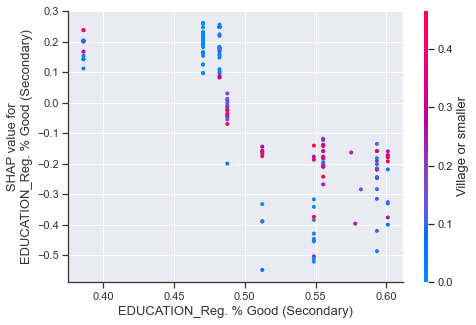

<Figure size 1152x720 with 0 Axes>

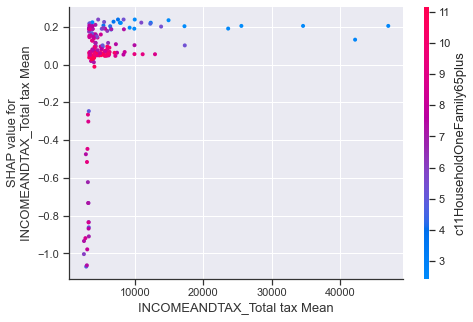

<Figure size 1152x720 with 0 Axes>

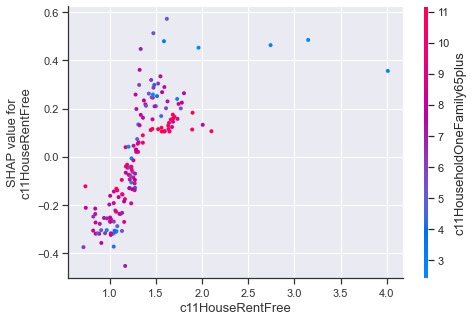

<Figure size 1152x720 with 0 Axes>

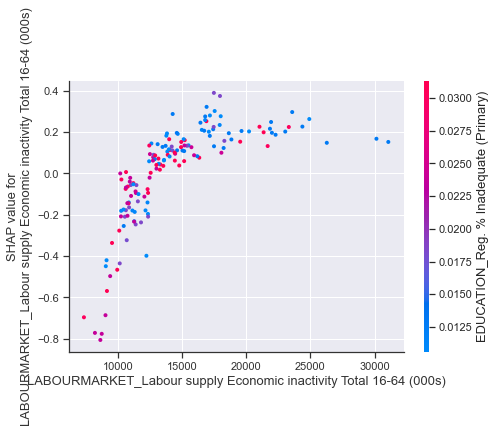

<Figure size 1152x720 with 0 Axes>

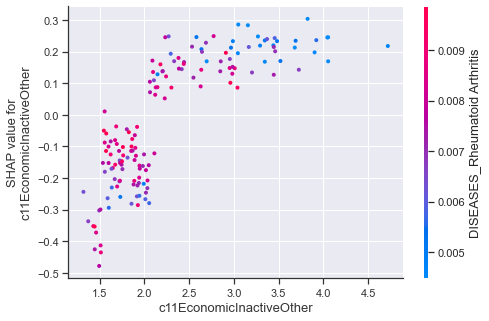

<Figure size 1152x720 with 0 Axes>

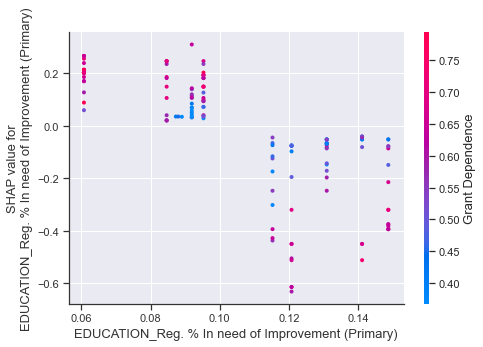

<Figure size 1152x720 with 0 Axes>

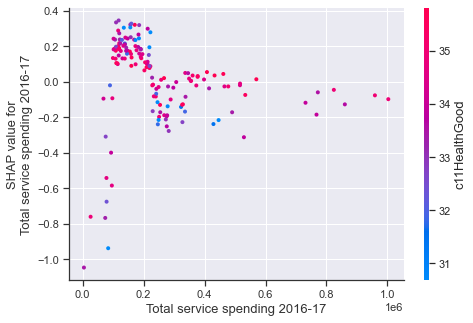

<Figure size 1152x720 with 0 Axes>

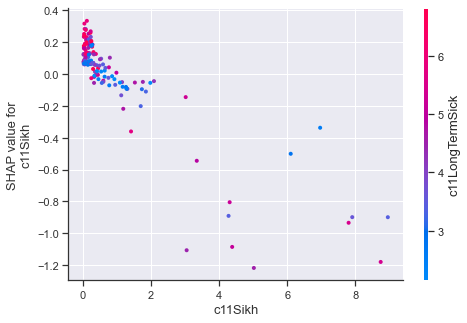

<Figure size 1152x720 with 0 Axes>

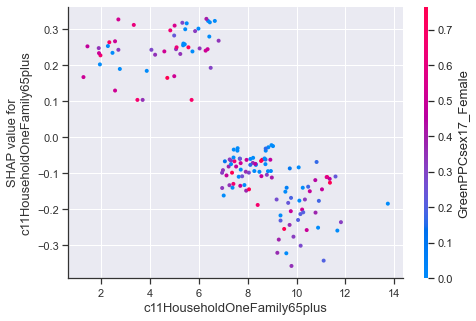

<Figure size 1152x720 with 0 Axes>

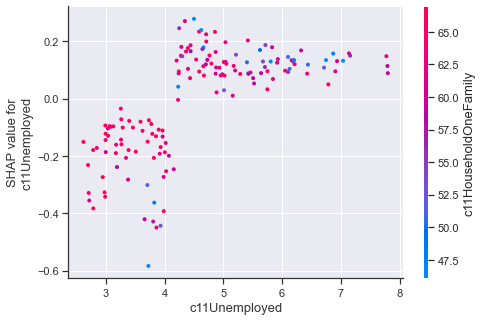

<Figure size 1152x720 with 0 Axes>

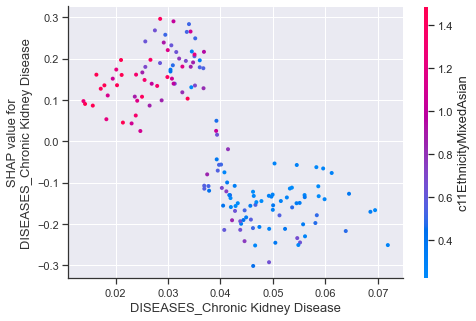

<Figure size 1152x720 with 0 Axes>

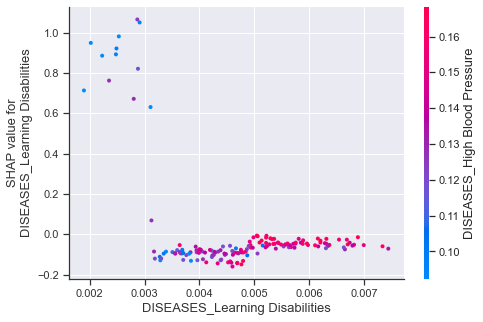

<Figure size 1152x720 with 0 Axes>

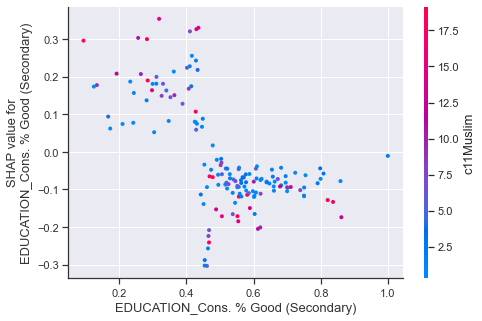

<Figure size 1152x720 with 0 Axes>

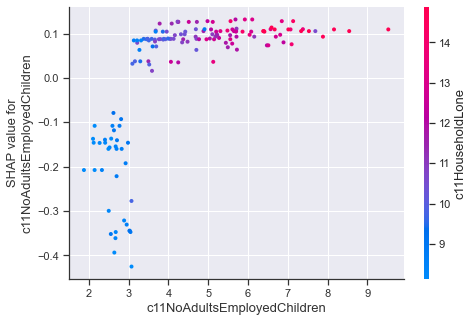

<Figure size 1152x720 with 0 Axes>

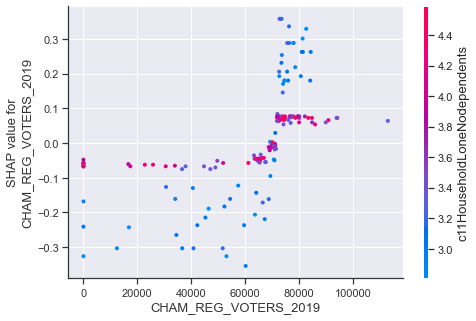

<Figure size 1152x720 with 0 Axes>

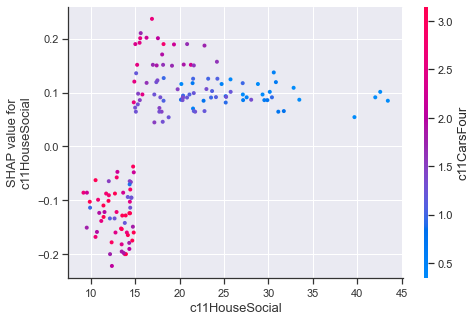

<Figure size 1152x720 with 0 Axes>

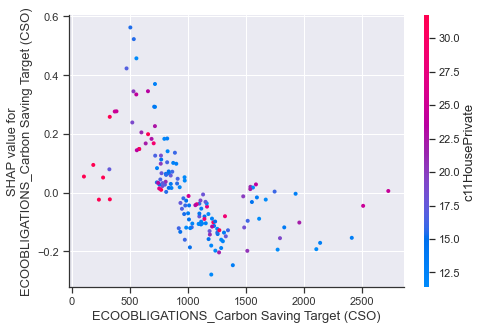

<Figure size 1152x720 with 0 Axes>

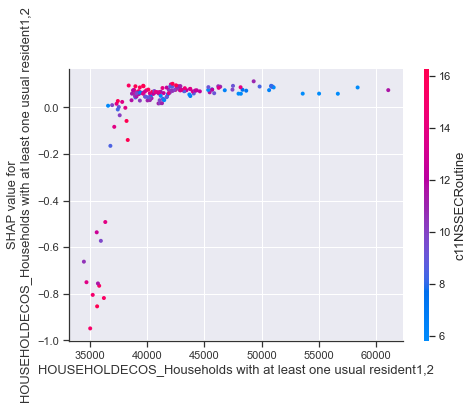

<Figure size 1152x720 with 0 Axes>

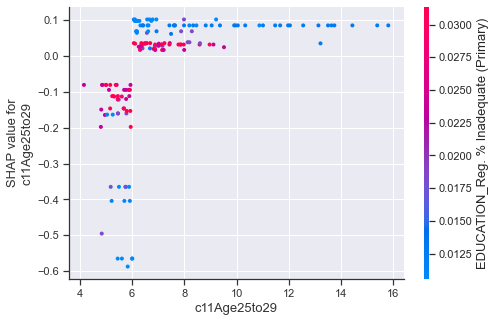

<Figure size 1152x720 with 0 Axes>

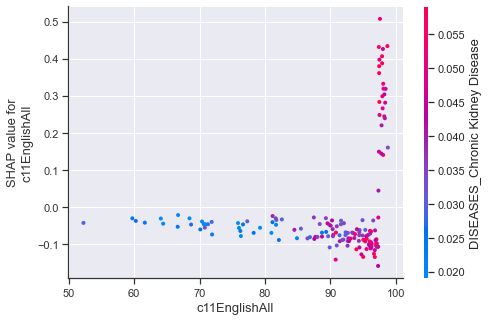

<Figure size 1152x720 with 0 Axes>

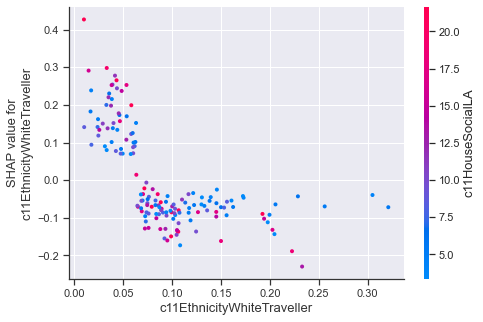

<Figure size 1152x720 with 0 Axes>

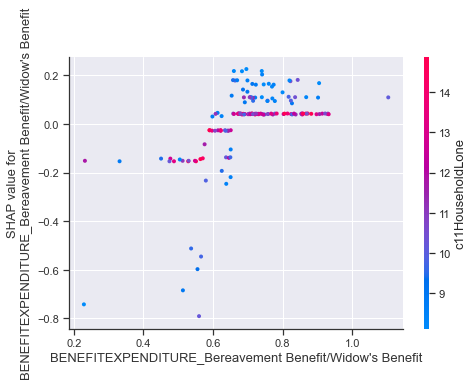

<Figure size 1152x720 with 0 Axes>

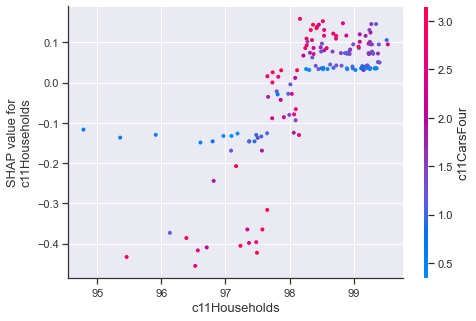

<Figure size 1152x720 with 0 Axes>

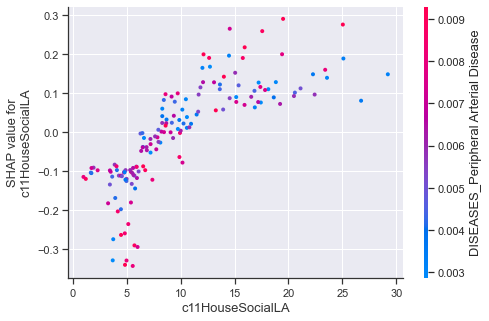

<Figure size 1152x720 with 0 Axes>

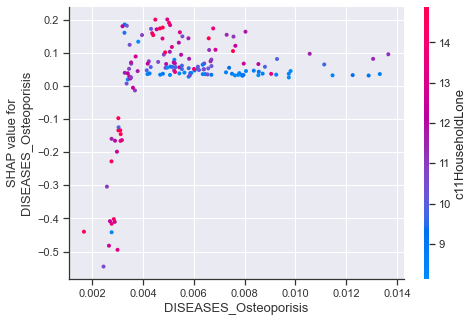

<Figure size 1152x720 with 0 Axes>

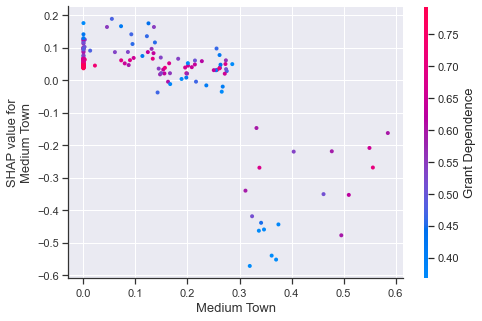

In [271]:
# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "Cut %"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_LA[var_stub].notnull()
wt_cols = []
min_features = 10
colname = "Cut %"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Cut %"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_LA.drop(["Cut Abs","Grant Dependence Decile"],axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

MSE: 69.40, MAE: 5.78, EV: 0.46, R2: 0.45


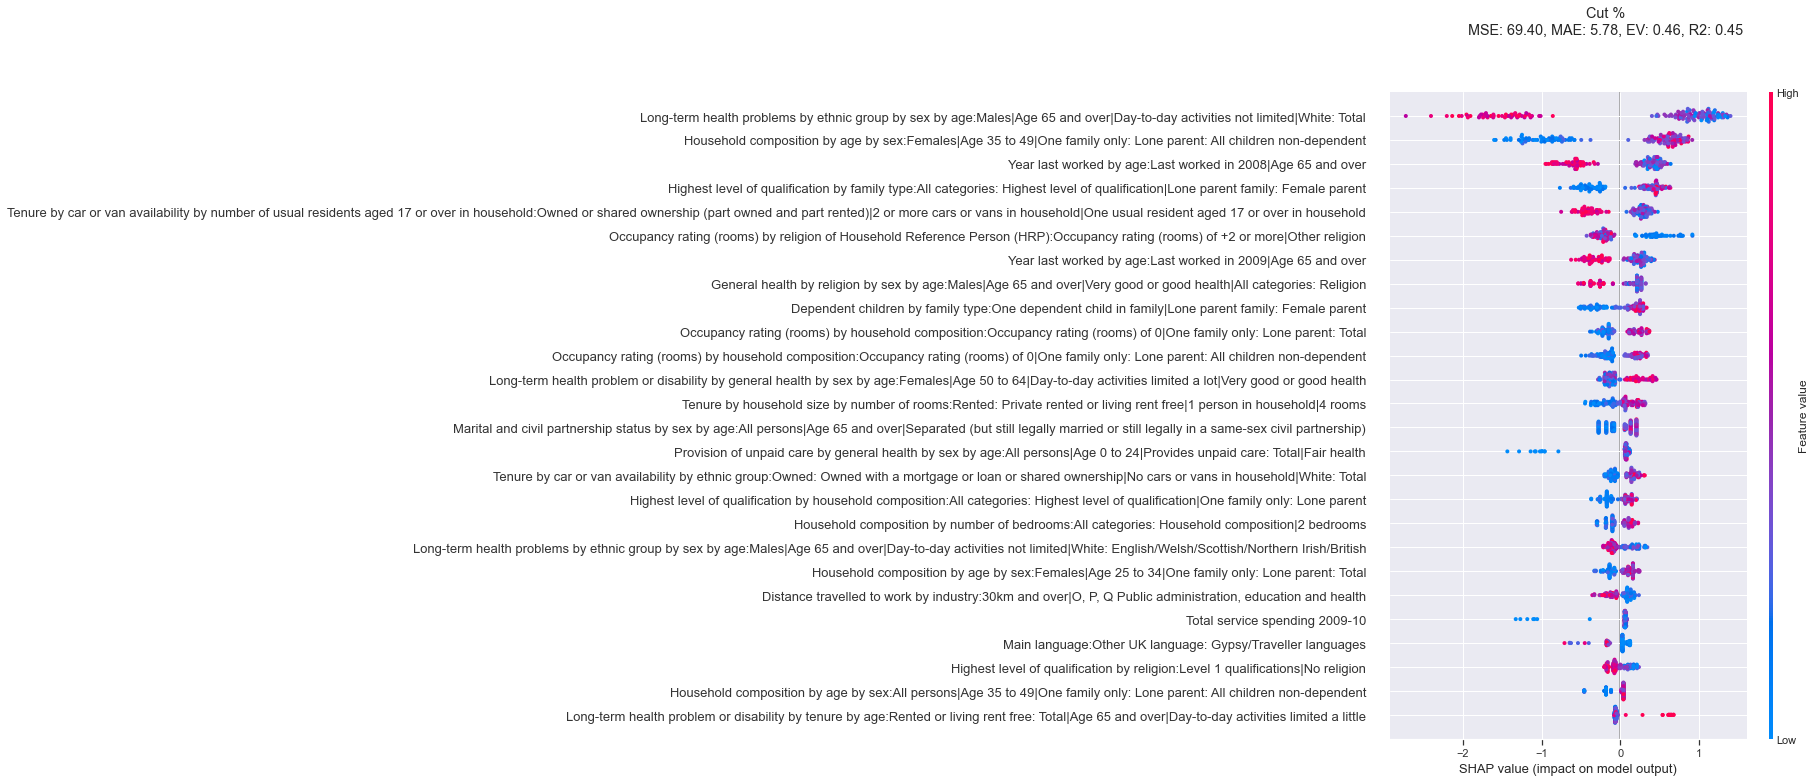

<Figure size 1152x720 with 0 Axes>

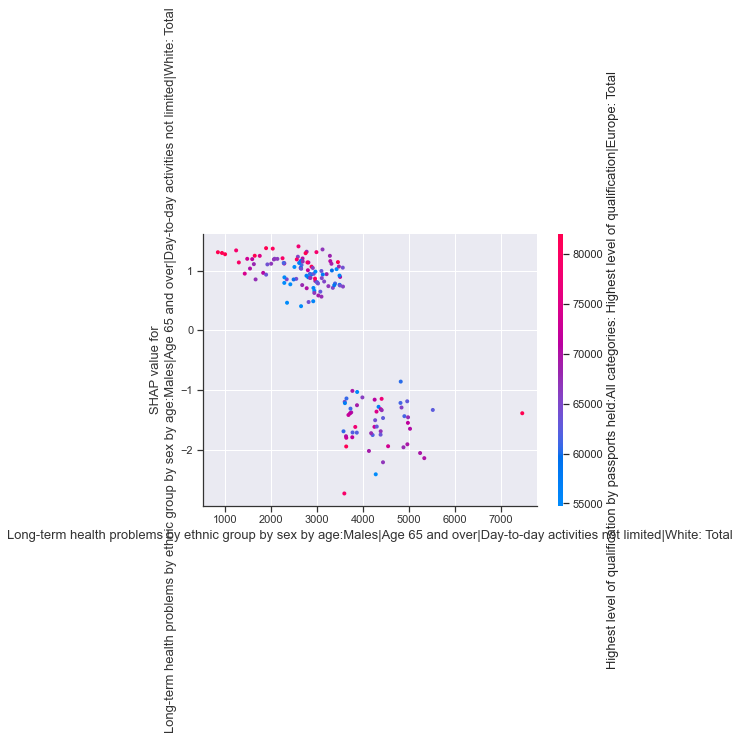

<Figure size 1152x720 with 0 Axes>

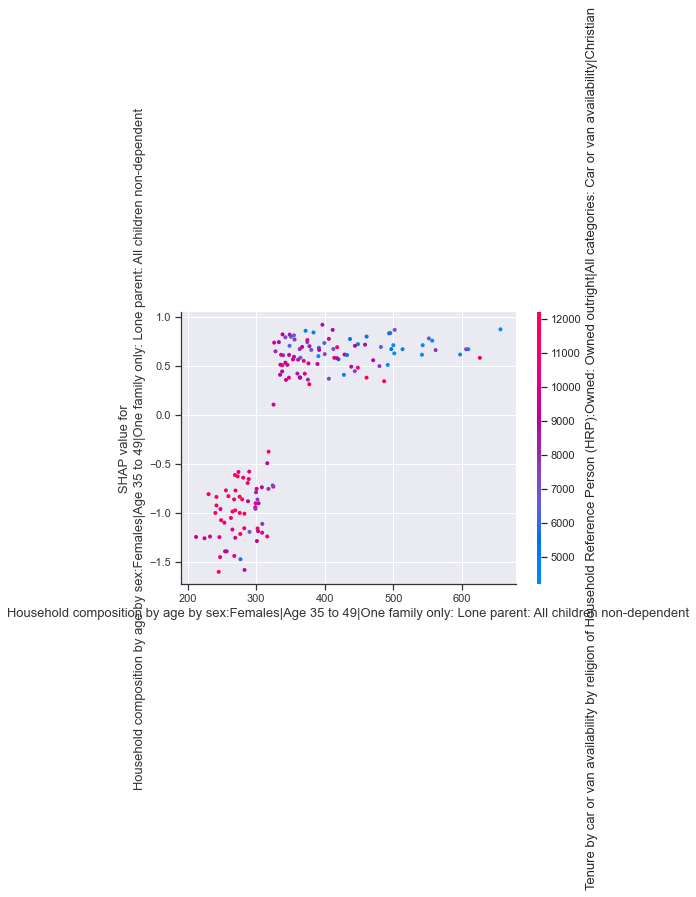

<Figure size 1152x720 with 0 Axes>

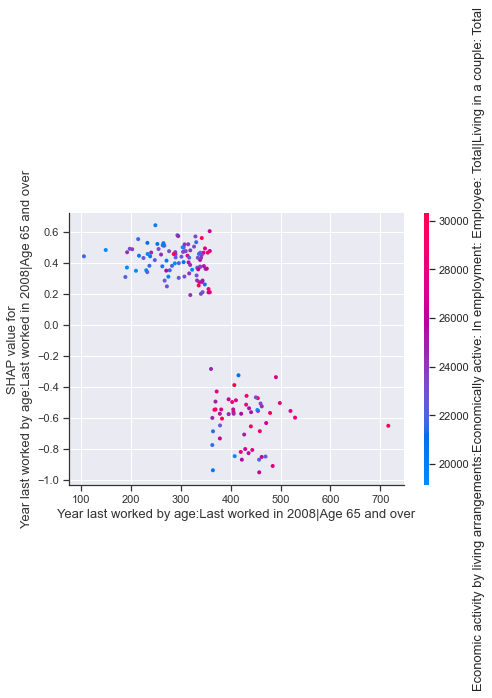

<Figure size 1152x720 with 0 Axes>

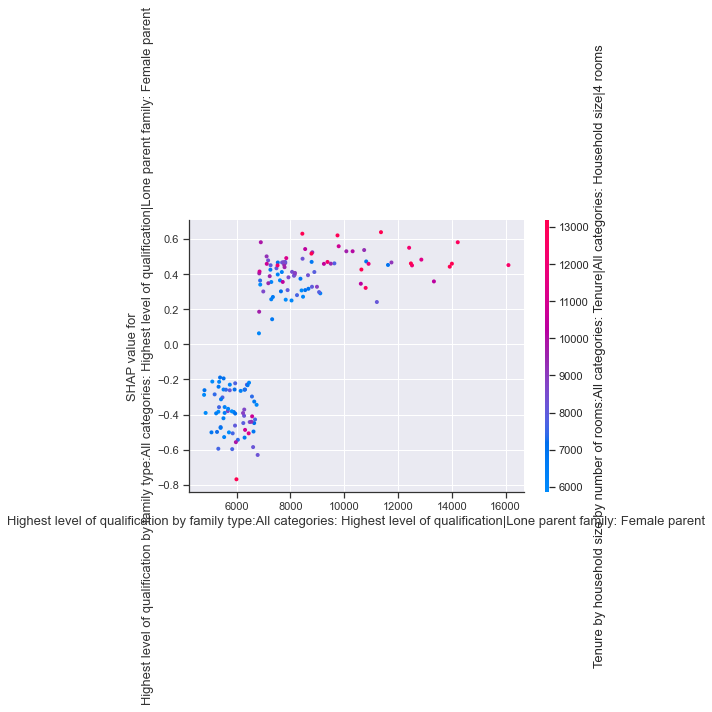

<Figure size 1152x720 with 0 Axes>

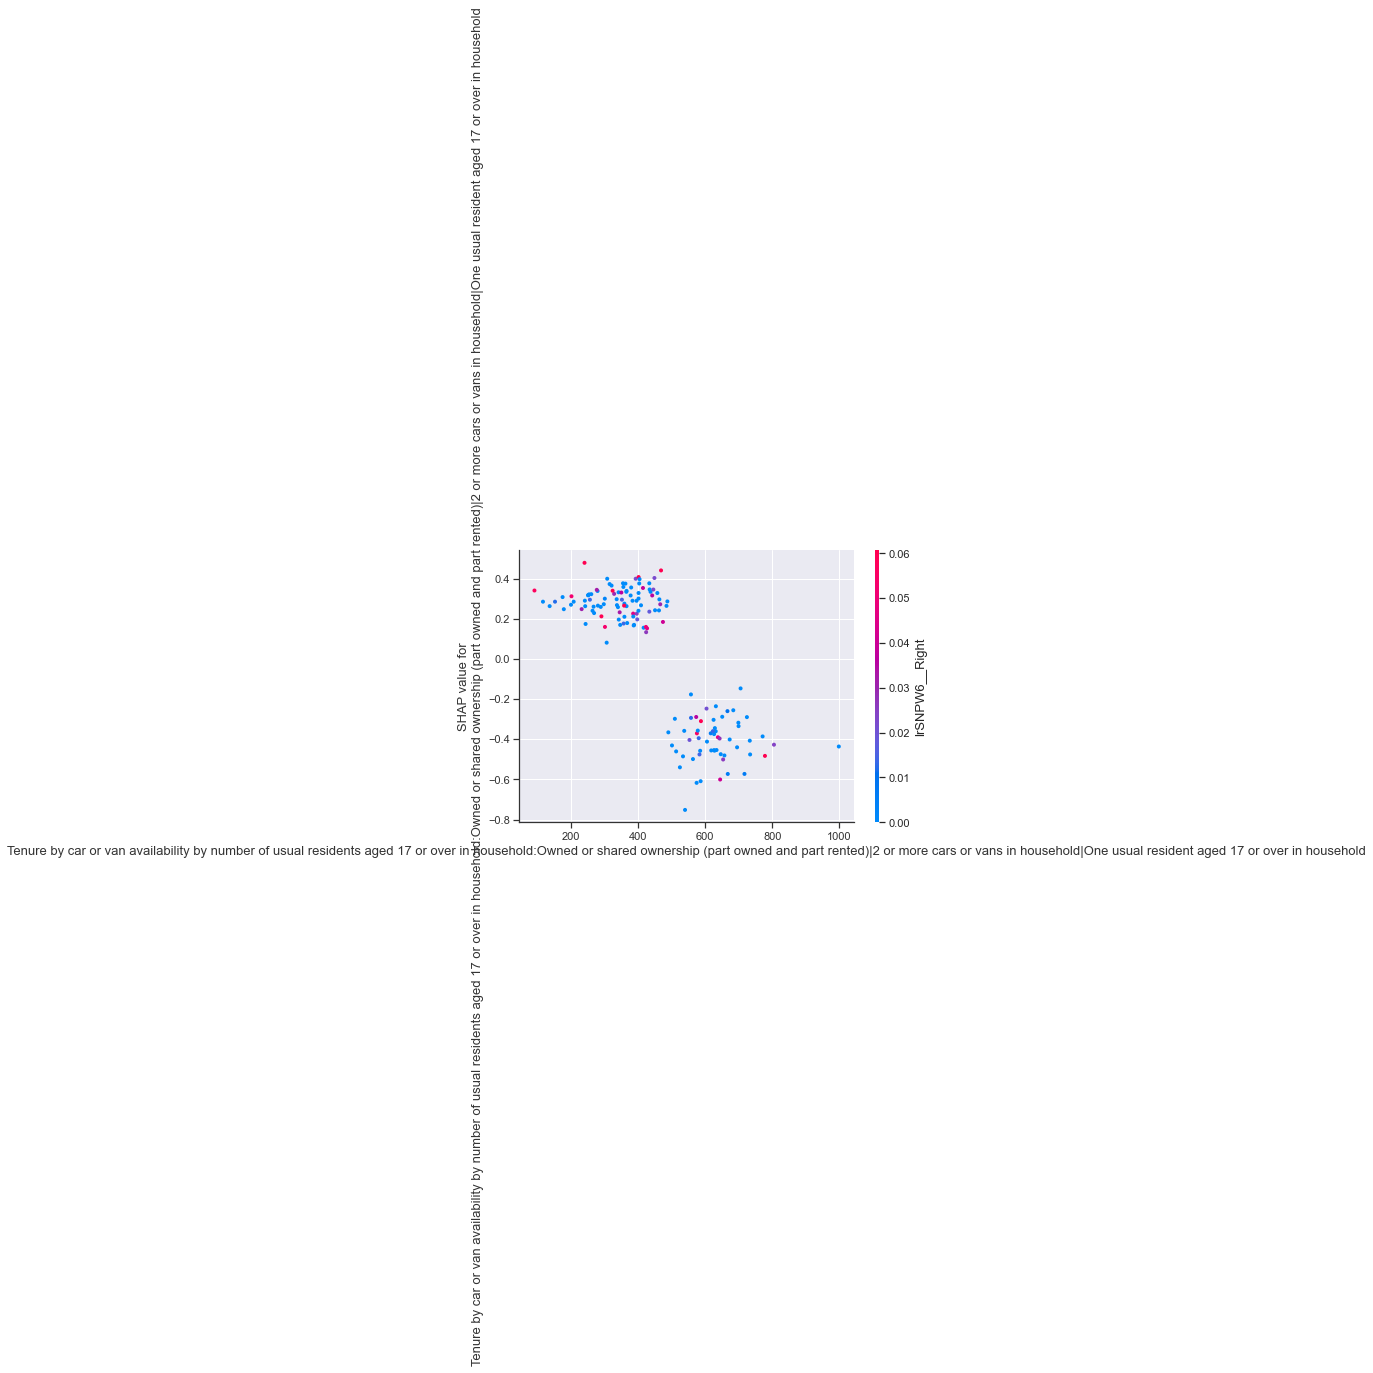

<Figure size 1152x720 with 0 Axes>

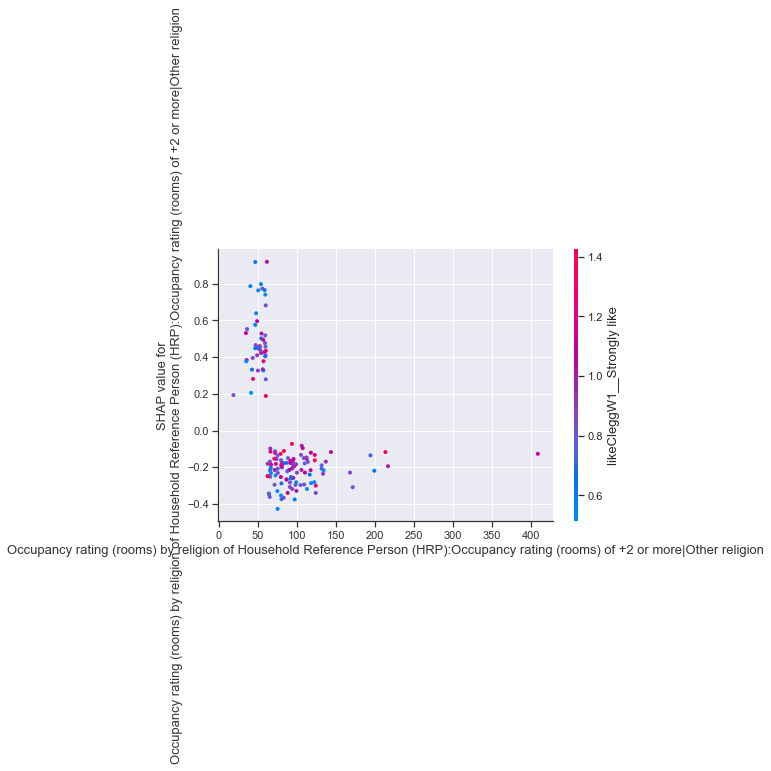

<Figure size 1152x720 with 0 Axes>

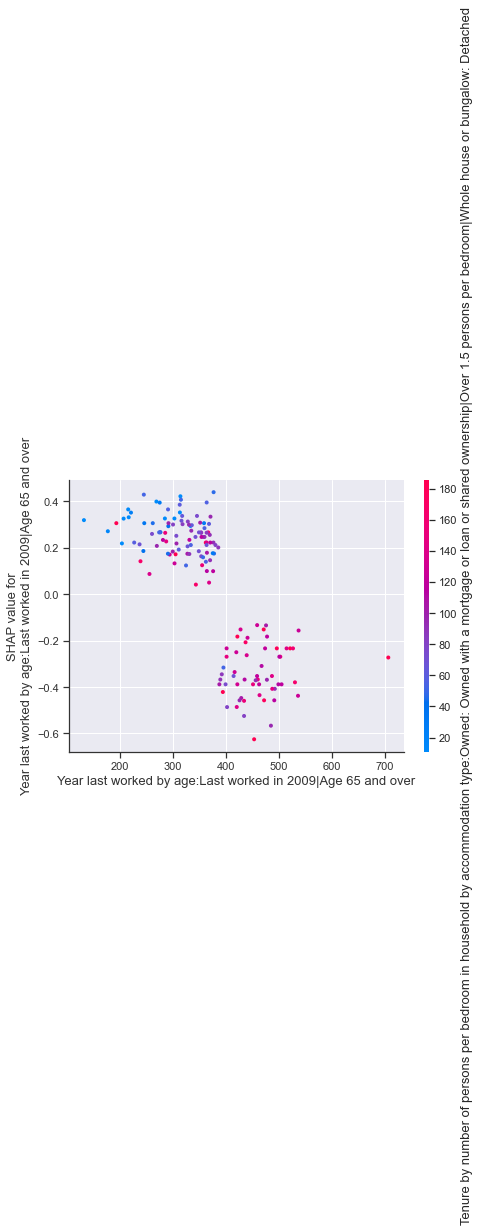

<Figure size 1152x720 with 0 Axes>

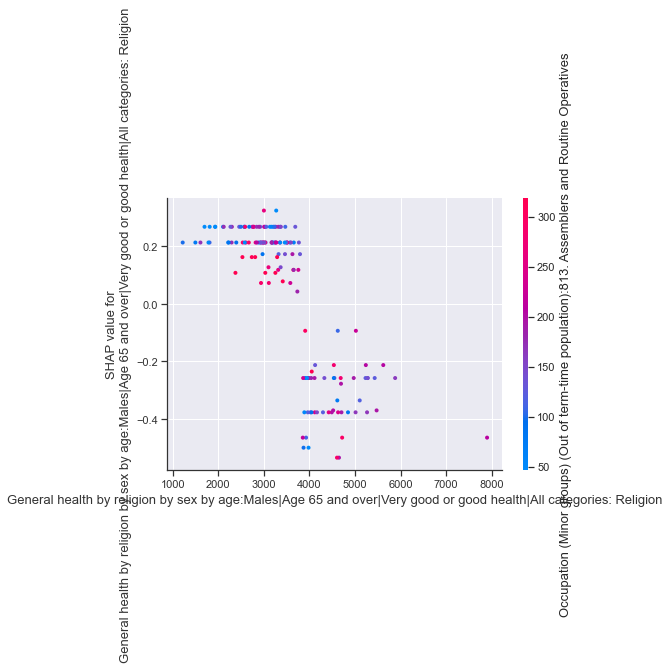

<Figure size 1152x720 with 0 Axes>

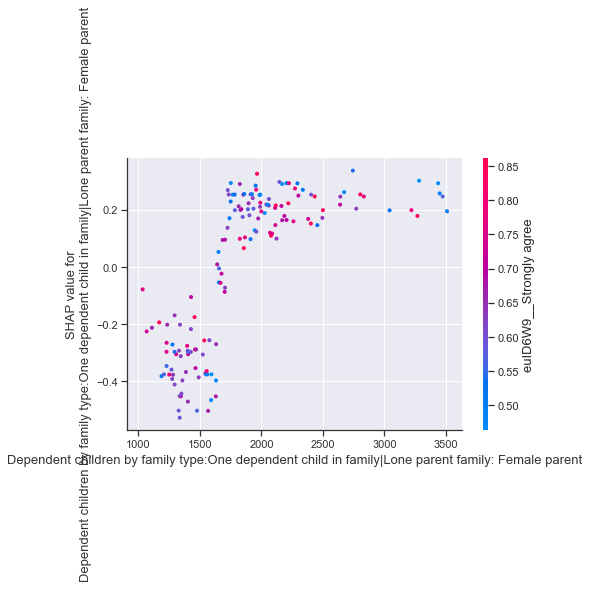

<Figure size 1152x720 with 0 Axes>

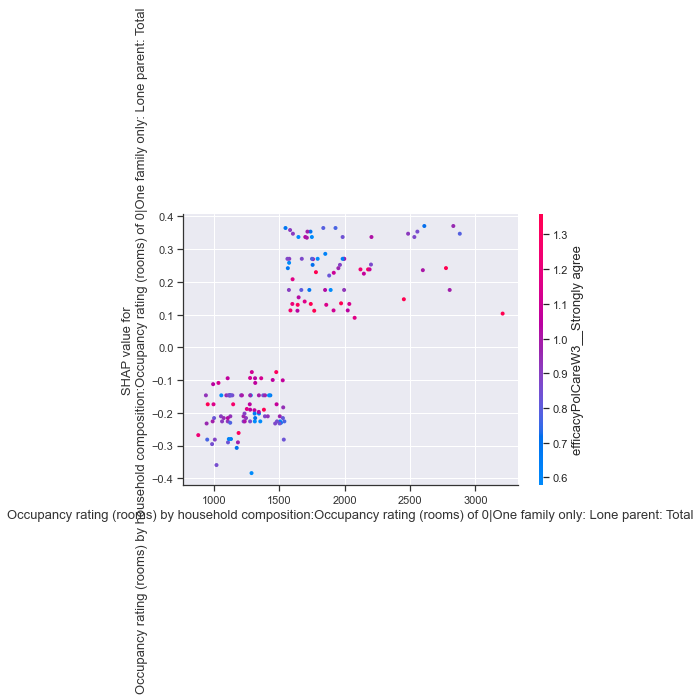

<Figure size 1152x720 with 0 Axes>

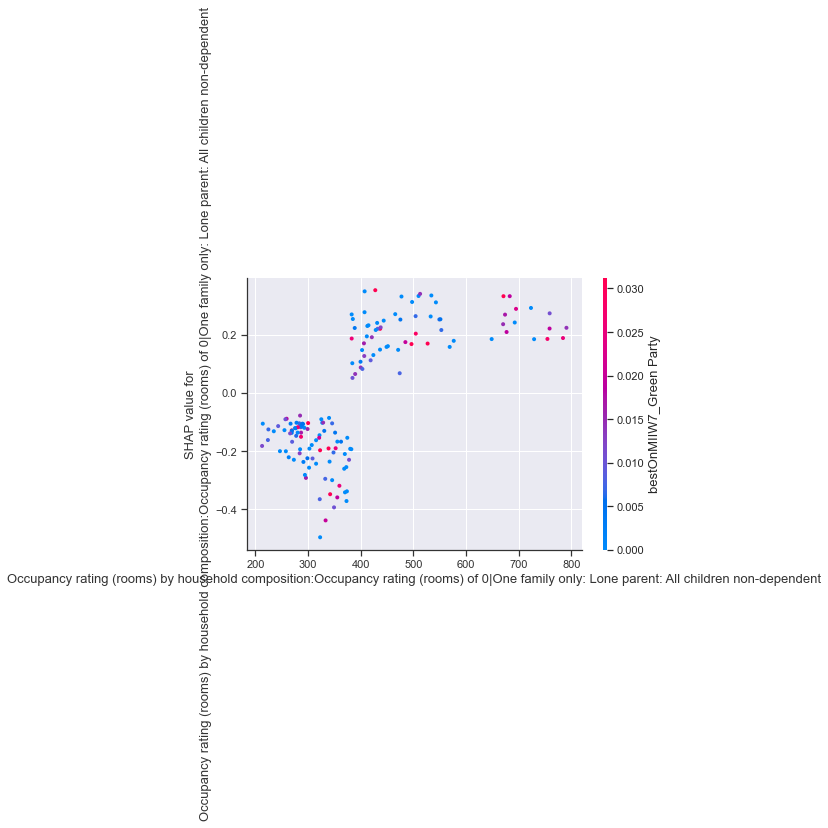

<Figure size 1152x720 with 0 Axes>

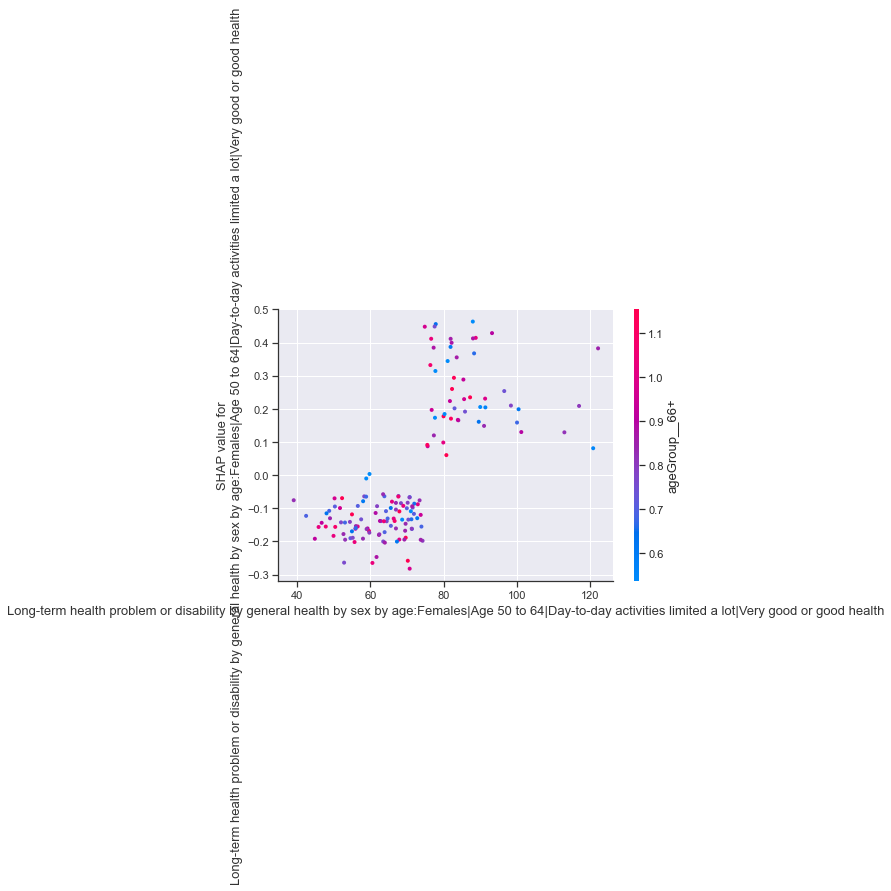

<Figure size 1152x720 with 0 Axes>

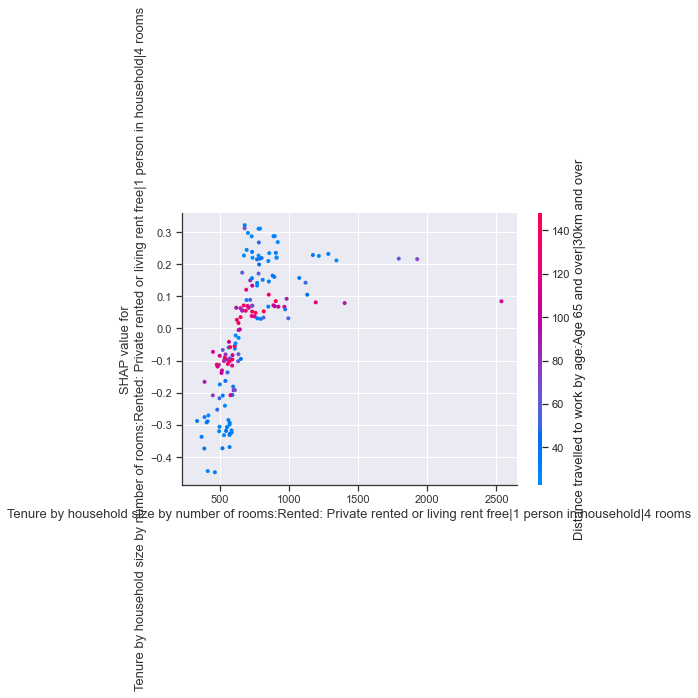

<Figure size 1152x720 with 0 Axes>

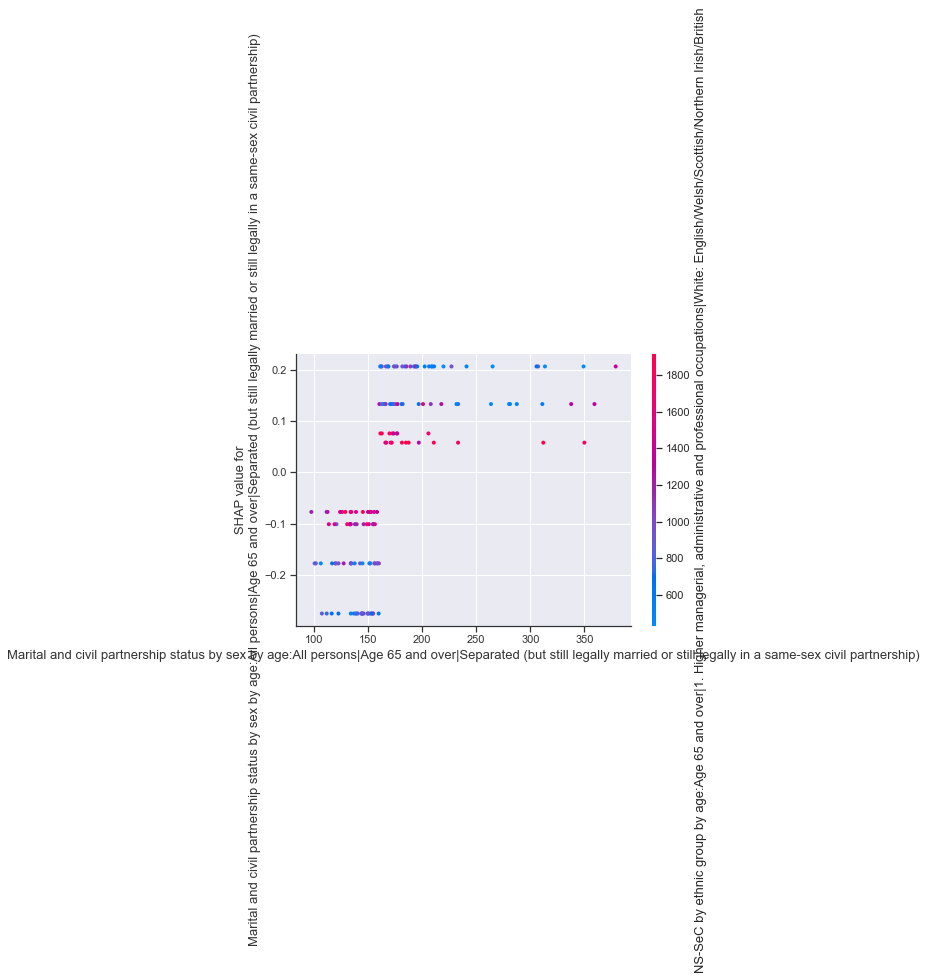

<Figure size 1152x720 with 0 Axes>

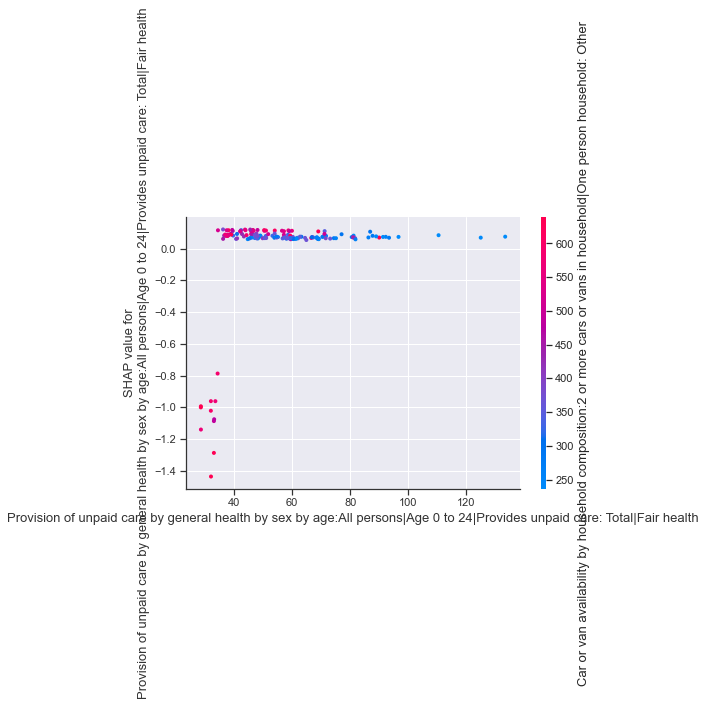

<Figure size 1152x720 with 0 Axes>

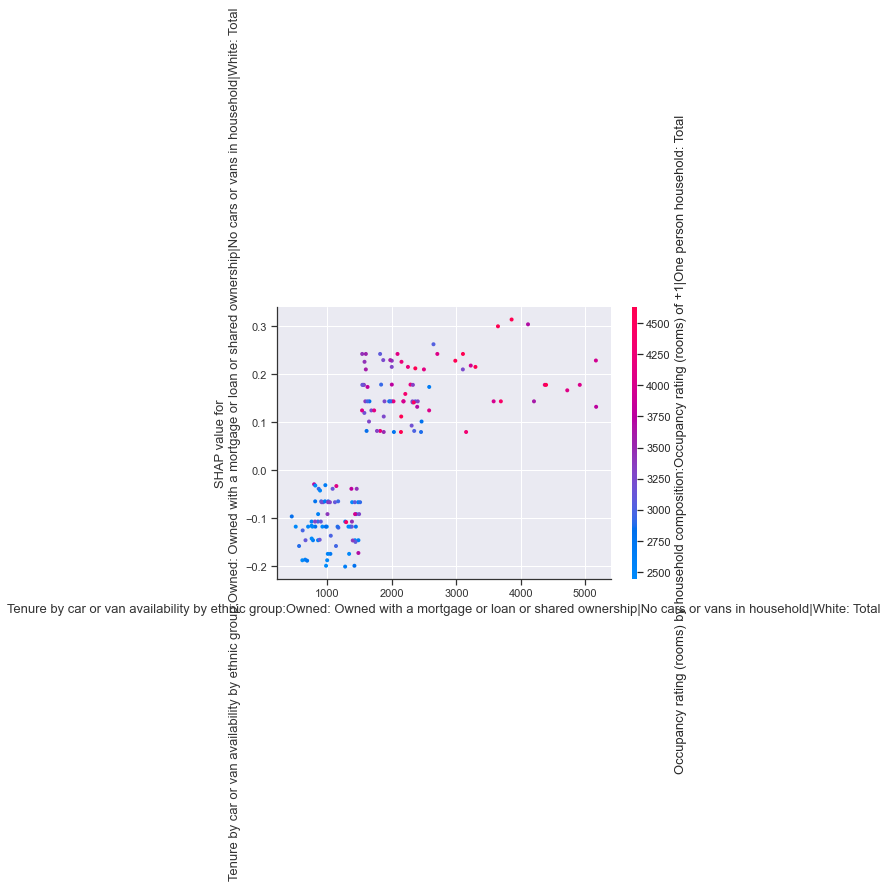

<Figure size 1152x720 with 0 Axes>

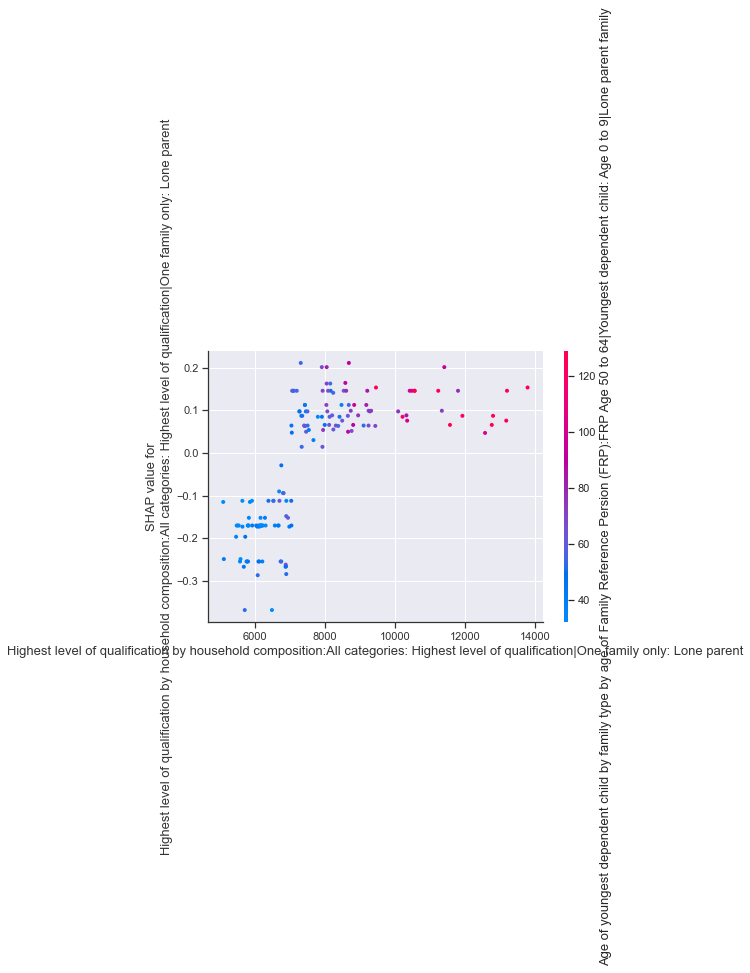

<Figure size 1152x720 with 0 Axes>

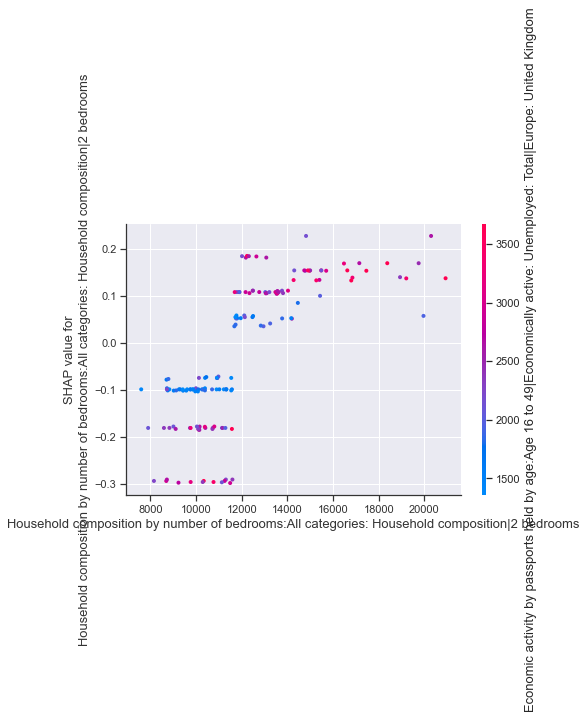

<Figure size 1152x720 with 0 Axes>

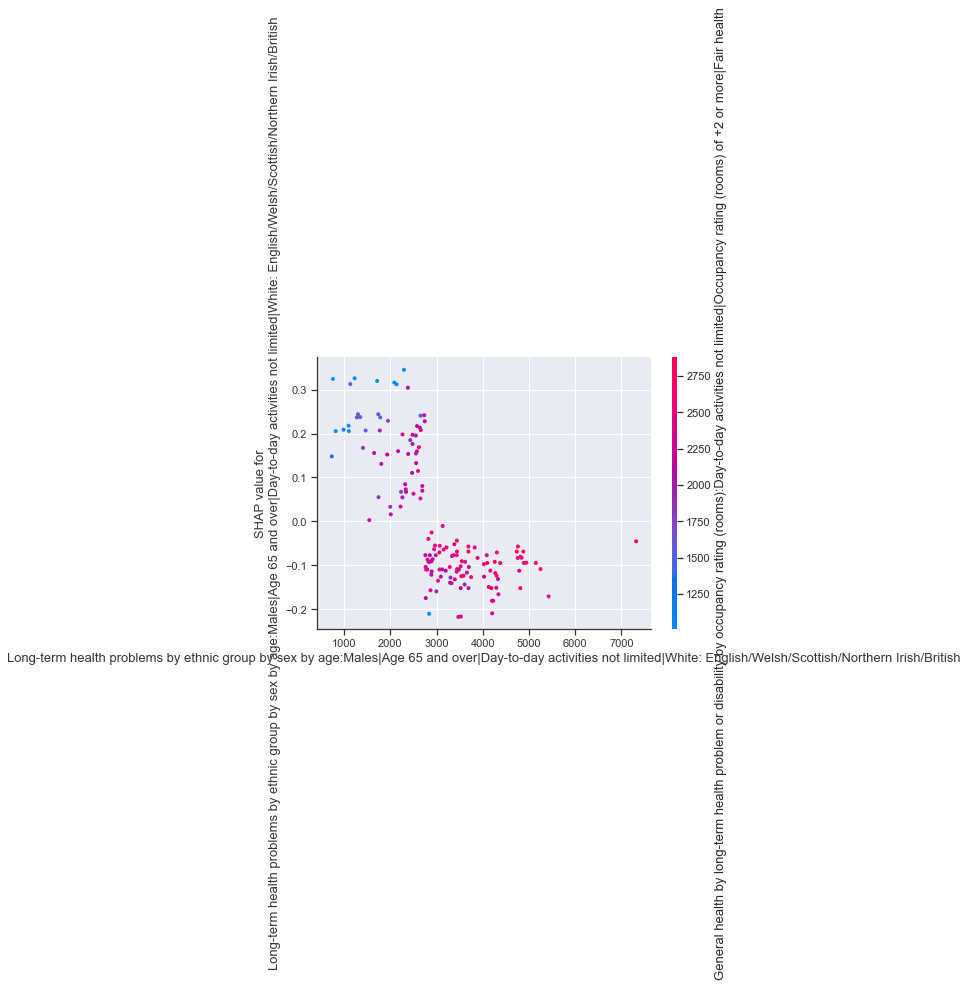

<Figure size 1152x720 with 0 Axes>

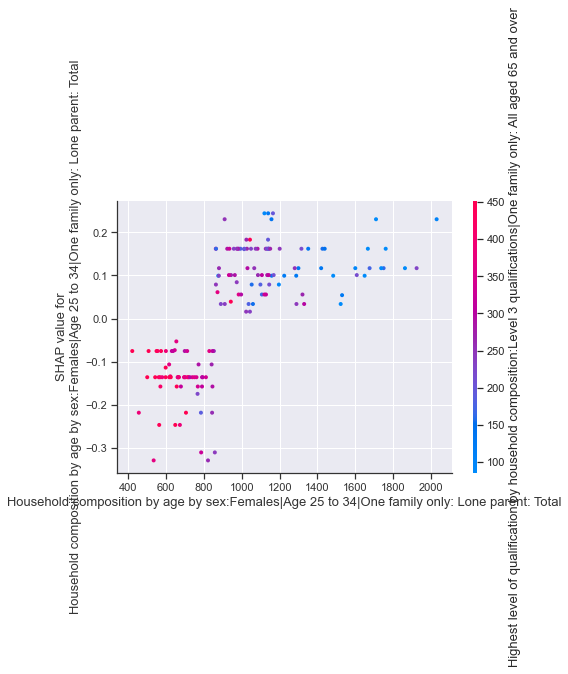

<Figure size 1152x720 with 0 Axes>

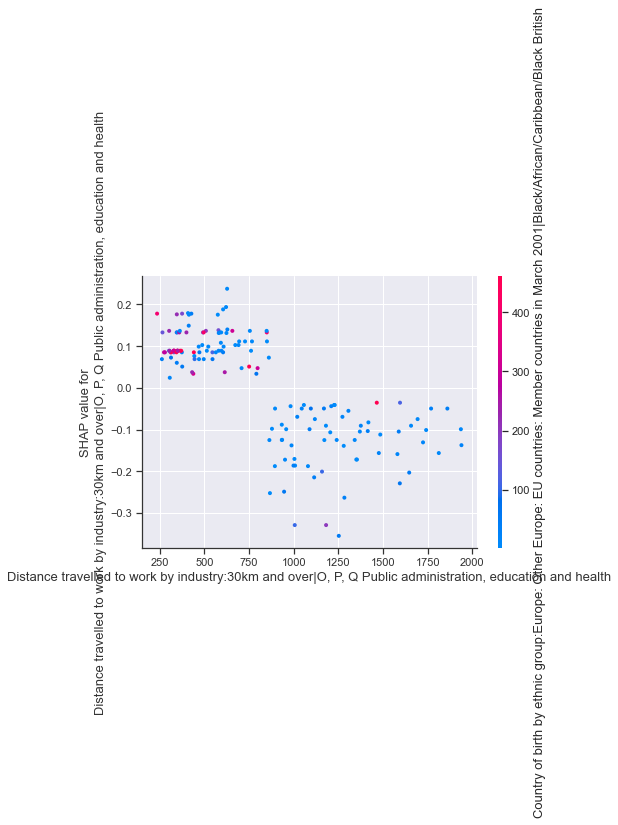

<Figure size 1152x720 with 0 Axes>

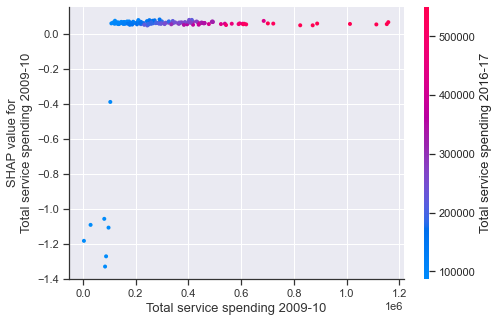

<Figure size 1152x720 with 0 Axes>

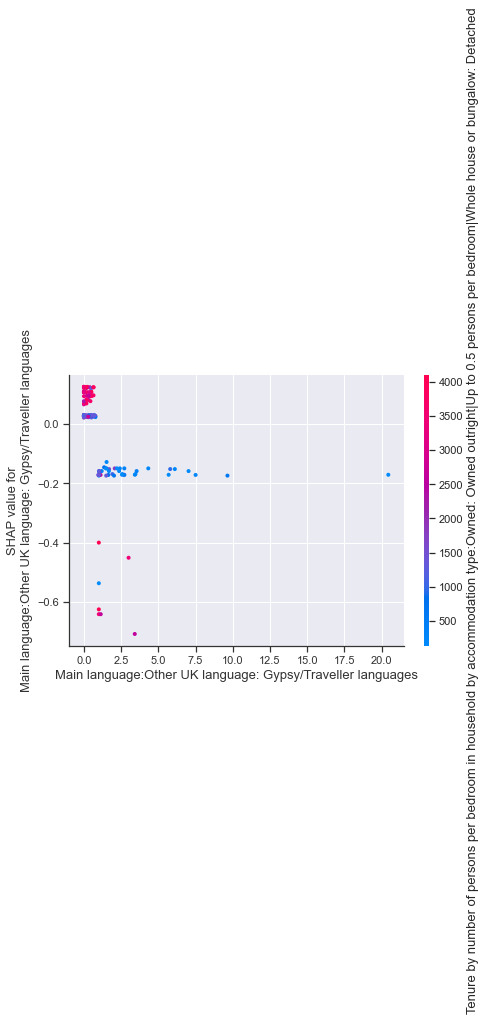

<Figure size 1152x720 with 0 Axes>

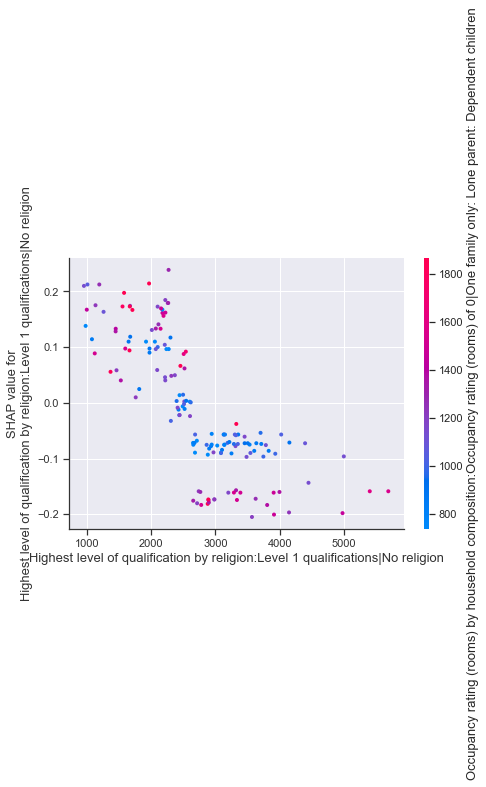

<Figure size 1152x720 with 0 Axes>

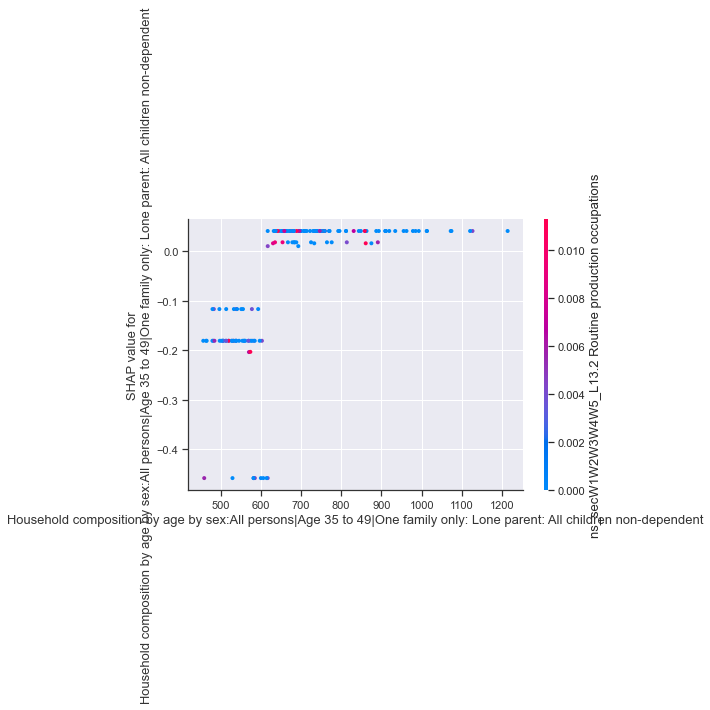

<Figure size 1152x720 with 0 Axes>

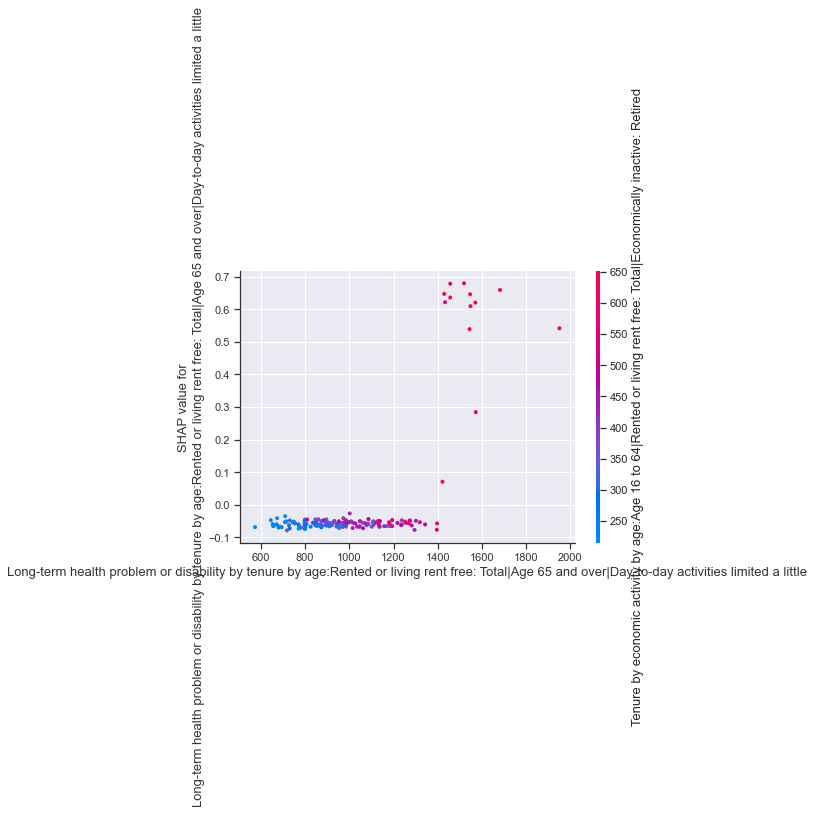

In [294]:
# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "Cut %"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_LA[var_stub].notnull()
wt_cols = []
min_features = 10
colname = "Cut %"
dependence_plots = True

alg = get_xgboost_alg(classification_problem=False)
title = "Cut %"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_LA.drop(["Cut Abs","Grant Dependence Decile"],axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)